TRABAJO FINAL MASTER
ALUMNO: JULIO DOUGLAS ANTONIO RUIZ GONZALEZ.

DIRECTOR TFM: Dr. ADRIAN COLOMER GRANERO.

En este cuaderno se hace mineria de datos aplicada a series temporales y descubrir conocimiento para predecir el consumo energetico de grandes edificios.
A continuacion se detallan los puntos a ver:

1. Compresion de los datos, recoleccion y exploracion de datos:
*   1.1 Importar librerias y datasets necesarias para este trabajo TFM.
GoogleDrive, fuente https://www.kaggle.com/c/ashrae-energy-prediction/data.
*   1.2 Caracteristicas de estos archivos, hay 16 características principales.
*   1.3 Visualizacion de atributos de los datasets.
*   1.4 Unir datos Elemento de la lista.
*   1.4.1 Unir datosElemento de la lista.

2. Limpieza de datos:
*   2.1 Analisis de datos faltantes o Missing.
*   2.1.1 Convertir serires temporales 'timestamp' al formato de fecha y hora. 
*   2.1.2 Tabla de valores faltantes.
*   2.1.3 Limpieza de valores faltantes. 
*   2.1.4 Interpolando los datos faltantes, interpolate().
*   2.2 Busqueda de valores atipicos Outliers.
*   2.2.1 Deteccion de Outliers de la variable objetivo 'meter_reading'.
*   2.3 Visualizacion de datos limpios.
*   2.4 Correlaciones entre datos.
*   2.4.1 Visualizacion de correlaciones entre datos.
*   2.5 Tendencias temporales con series de datos.
*   2.5.1 Graficas de Condiciones climaticas


1. Compresion de los datos, recoleccion y exploracion.

1.1 Importar librerias y datasets necesarias para este trabajo TFM.
GoogleDrive de archivos de la fuente https://www.kaggle.com/c/ashrae-energy-prediction/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from scipy.stats import kurtosis 
from scipy.stats import skew 
import scipy.stats as st
from sklearn.covariance import EllipticEnvelope
import gc
sns.set()
import plotly.express as px
import missingno as msno
pd.set_option('max_columns', 150)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
BASE_FOLDER = '/content/drive/My Drive/TFM IA Julio Ruiz/'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1 = BASE_FOLDER+ "building_metadata.csv"
path2 = BASE_FOLDER+ "train.csv"
path3 = BASE_FOLDER+ "test.csv"
path4 = BASE_FOLDER+ "weather_train.csv"
path5 = BASE_FOLDER+ "weather_test.csv"

In [ ]:
building_df = pd.read_csv(path1)
train_df = pd.read_csv(path2)
test_df = pd.read_csv(path3)
weather_train_df = pd.read_csv(path4)
weather_test_df = pd.read_csv(path5)

1.2 Caracteristicas de estos archivos, hay 16 características principales:
    

1. Site ID: site_id
    identificador del sitio donde se encuentra el edificio.
    categorical: units = #
    
2. Building_ID: building_id
    identificador del edificio.
    categorical: units = #
    
3. Primary Use:  Primary Use
    uso principal del edificio.
    categorical: units = String
    Education
    Lodging/residential
    Office
    Entertainment/public assembly
    Other
    Retail
    Parking
    Public services
    Warehouse/storage
    Food sales and service
    Religious worship
    Healthcare
    Utility
    Technology/science
    Manufacturing/industrial
    Services
    
4. Square Feet: square_feet
    area total del edificio
    continuous: units = ft^2
    
5. Year Built: year_built
    Year Built, año en que fue construido el edificio.
    continuous: units = years
    
6. Floor Count: floor_count
    numero de niveles en el edificio.
    continuous: units = #unt
    
7. Time Stamp: timestamp
    marca de tiempo para los datos.
    continuous: units = MM/DD/YR HR:Min
    
8. Air Temperature: air_temperature
   temperatura del aire en ese momento.
   continuous: units = Degrees Celsius
   
9. Cloud Coverage: cloud_coverage
   cantidad de cielo cubierto por las nubes
   continuous: units = oktas
   
10. Dew Temperature: dew_temperature
    temperatura de rocio del aire en ese momento.
    continuous: units = Degrees Celsius
    
11. Precipitation Depth at 1 hour: precip_depth_1_hr
    es la profundidad de precipitación a 1 hora.
    continuous: units = mm
    
12. Pressure for Sea Level: sea_level_pressure
    Presión a nivel del mar.
    continuous: units = millibar/hectopascals
    
13. Wind Direction: wind_direction
    Dirección de la brújula (0-360 grados) sopla el viento.
    continuous: units = degrees
    
14. Wind Speed: wind_speed
    Velocidad que sopla el viento.
    continuous: units = m/s
    
15. Row ID: row_id
    ID de fila en el archivo de datos test.csv.
    continuous: units = #
    
16. Meter: meter
    número del medidor está en los archivos test.csv y data.csv.
    continuous: units = # (Integer)
    0: electricity
    1: chilledwater
    2: steam
    3: hotwater
    
17. Meter Reading: meter_reading
    Número del medidor está en el archivo data.csv.
    continuous: units = # (Decimal)


Reducir tamaño de memoria:

In [ ]:
print('Tamaño de building_df', building_df.shape)
print('Tamaño de train_df', train_df.shape)
print('Tamaño de test_df', test_df.shape)
print('Tamaño de weather_train_df', weather_train_df.shape)
print('Tamaño de weather_test_df', weather_test_df.shape)


Tamaño de building_df (1449, 6)
Tamaño de train_df (20216100, 4)
Tamaño de test_df (41697600, 4)
Tamaño de weather_train_df (139773, 9)
Tamaño de weather_test_df (277243, 9)


Esta función proviene de CeasarLupum, Ref[1], esta es una excelente función para reducir la memoria de nuestro problema.

Funcion: reduce_mem_usage

In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Memoria usada disminuida a {:5.2f} Mb ({:.1f}% reduccion)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
#Reduciendo memoria
building_df = reduce_mem_usage(building_df)
train_df = reduce_mem_usage(train_df)
weather_train_df = reduce_mem_usage(weather_train_df)
test_df = reduce_mem_usage(test_df)
weather_test_df = reduce_mem_usage(weather_test_df)

Memoria usada disminuida a  0.03 Mb (60.3% reduccion)
Memoria usada disminuida a 289.19 Mb (53.1% reduccion)
Memoria usada disminuida a  3.07 Mb (68.1% reduccion)
Memoria usada disminuida a 596.49 Mb (53.1% reduccion)
Memoria usada disminuida a  6.08 Mb (68.1% reduccion)


1.3 Visualizacion de atributos de los datasets:

In [ ]:
print(building_df.head(5))# ver las primeras cinco filas


   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN


In [ ]:
print(building_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int8   
 1   building_id  1449 non-null   int16  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int32  
 4   year_built   675 non-null    float16
 5   floor_count  355 non-null    float16
dtypes: float16(2), int16(1), int32(1), int8(1), object(1)
memory usage: 27.0+ KB
None


In [ ]:
print(train_df.head(5))# ver las primeras cinco filas


   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            1      0  2016-01-01 00:00:00            0.0
2            2      0  2016-01-01 00:00:00            0.0
3            3      0  2016-01-01 00:00:00            0.0
4            4      0  2016-01-01 00:00:00            0.0


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int16  
 1   meter          int8   
 2   timestamp      object 
 3   meter_reading  float32
dtypes: float32(1), int16(1), int8(1), object(1)
memory usage: 289.2+ MB
None


In [ ]:
print(test_df.head(5))# ver las primeras cinco filas


   row_id  building_id  meter            timestamp
0       0            0      0  2017-01-01 00:00:00
1       1            1      0  2017-01-01 00:00:00
2       2            2      0  2017-01-01 00:00:00
3       3            3      0  2017-01-01 00:00:00
4       4            4      0  2017-01-01 00:00:00


In [ ]:
print(test_df.info(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   row_id       int32 
 1   building_id  int16 
 2   meter        int8  
 3   timestamp    object
dtypes: int16(1), int32(1), int8(1), object(1)
memory usage: 596.5+ MB
None


In [ ]:
print(weather_train_df.head(5))# ver las primeras cinco filas


   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00        25.000000             6.0   
1        0  2016-01-01 01:00:00        24.406250             NaN   
2        0  2016-01-01 02:00:00        22.796875             2.0   
3        0  2016-01-01 03:00:00        21.093750             2.0   
4        0  2016-01-01 04:00:00        20.000000             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0         20.00000                NaN              1019.5             0.0   
1         21.09375               -1.0              1020.0            70.0   
2         21.09375                0.0              1020.0             0.0   
3         20.59375                0.0              1020.0             0.0   
4         20.00000               -1.0              1020.0           250.0   

   wind_speed  
0    0.000000  
1    1.500000  
2    0.000000  
3    0.000000  
4    2.599609  


In [ ]:
print(weather_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int8   
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float16
 3   cloud_coverage      70600 non-null   float16
 4   dew_temperature     139660 non-null  float16
 5   precip_depth_1_hr   89484 non-null   float16
 6   sea_level_pressure  129155 non-null  float16
 7   wind_direction      133505 non-null  float16
 8   wind_speed          139469 non-null  float16
dtypes: float16(7), int8(1), object(1)
memory usage: 3.1+ MB
None


In [ ]:
print(weather_test_df.head(5))# ver las primeras cinco filas


   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2017-01-01 00:00:00        17.796875             4.0   
1        0  2017-01-01 01:00:00        17.796875             2.0   
2        0  2017-01-01 02:00:00        16.093750             0.0   
3        0  2017-01-01 03:00:00        17.203125             0.0   
4        0  2017-01-01 04:00:00        16.703125             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0        11.703125                NaN              1021.5           100.0   
1        12.796875                0.0              1022.0           130.0   
2        12.796875                0.0              1022.0           140.0   
3        13.296875                0.0              1022.0           140.0   
4        13.296875                0.0              1022.5           130.0   

   wind_speed  
0    3.599609  
1    3.099609  
2    3.099609  
3    3.099609  
4    2.599609  


In [ ]:
print(weather_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             277243 non-null  int8   
 1   timestamp           277243 non-null  object 
 2   air_temperature     277139 non-null  float16
 3   cloud_coverage      136795 non-null  float16
 4   dew_temperature     276916 non-null  float16
 5   precip_depth_1_hr   181655 non-null  float16
 6   sea_level_pressure  255978 non-null  float16
 7   wind_direction      264873 non-null  float16
 8   wind_speed          276783 non-null  float16
dtypes: float16(7), int8(1), object(1)
memory usage: 6.1+ MB
None


Nombres únicos en primary_use hay 16 como se muestra a continuación:

In [ ]:
pd.DataFrame(building_df['primary_use'].unique(), columns=['primary_use'])

primary_use
0                       Education
1             Lodging/residential
2                          Office
3   Entertainment/public assembly
4                           Other
5                          Retail
6                         Parking
7                 Public services
8               Warehouse/storage
9          Food sales and service
10              Religious worship
11                     Healthcare
12                        Utility
13             Technology/science
14       Manufacturing/industrial
15                       Services

Edificios únicos en building_id hay 1449 como se muestra a continuación:

In [ ]:
pd.DataFrame(building_df['building_id'].unique(), columns=['building_id'])

building_id
0               0
1               1
2               2
3               3
4               4
...           ...
1444         1444
1445         1445
1446         1446
1447         1447
1448         1448

[1449 rows x 1 columns]

1.4 Seleccion de los datos:

1.4.1 Unir datos

In [ ]:
# Datos Train
train_df = train_df.merge(building_df, on='building_id', how='left')
train_df = train_df.merge(weather_train_df, on=['site_id', 'timestamp'], how='left')


# Datos Test
test_df = test_df .merge(building_df, on='building_id', how='left')
test_df  = test_df .merge(weather_test_df, on=['site_id', 'timestamp'], how='left')

In [ ]:
train_df=train_df.reset_index()
test_df=test_df.reset_index()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   index               int64  
 1   building_id         int16  
 2   meter               int8   
 3   timestamp           object 
 4   meter_reading       float32
 5   site_id             int8   
 6   primary_use         object 
 7   square_feet         int32  
 8   year_built          float16
 9   floor_count         float16
 10  air_temperature     float16
 11  cloud_coverage      float16
 12  dew_temperature     float16
 13  precip_depth_1_hr   float16
 14  sea_level_pressure  float16
 15  wind_direction      float16
 16  wind_speed          float16
dtypes: float16(9), float32(1), int16(1), int32(1), int64(1), int8(2), object(2)
memory usage: 1.0+ GB


Cambio de Unidades de medicion al sistema metrico para que los datos sean congruentes y se pueda interpretar correctamente.


Arreglo de unidades de medicion para el Sitio 0, metro = 0 (electric), según la corrección de la unidad. Multiplique por 0.2931 para obtener entradas del modelo en kWh como otros sitios, y 3.4118 para volver a kBTU para la puntuación.

In [ ]:

train_df[(train_df['site_id'] == 0)&(train_df['meter']==0)]['meter_reading']

0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
               ...    
20213856    201.492004
20213857     84.364403
20213858     33.302101
20213859     39.179001
20213861    273.364990
Name: meter_reading, Length: 908409, dtype: float32

In [ ]:

train_df.loc[(train_df['site_id'] == 0) & (train_df['meter'] == 0),
          'meter_reading'] = train_df[(train_df['site_id'] == 0) & (train_df['meter'] == 0)]['meter_reading'] * 0.2931

In [ ]:
[train_df.loc[(train_df['site_id'] == 0)&(train_df['meter']==0),'meter_reading']]

[0            0.000000
 1            0.000000
 2            0.000000
 3            0.000000
 4            0.000000
               ...    
 20213856    59.057308
 20213857    24.727207
 20213858     9.760846
 20213859    11.483365
 20213861    80.123276
 Name: meter_reading, Length: 908409, dtype: float32]


Cambio unidades square_feet area total del edificio, 1pie2 = 0.09m2

In [ ]:
pd.DataFrame(train_df['square_feet'].unique(), columns=['square_feet'])

square_feet
0            7432
1            2720
2            5376
3           23685
4          116607
...           ...
1392        82670
1393          387
1394        59326
1395       143110
1396        49500

[1397 rows x 1 columns]

In [ ]:

train_df['square_feet'] = (train_df['square_feet'] * 0.09)
test_df['square_feet'] = (test_df['square_feet'] * 0.09)

In [ ]:
train_df=train_df.rename(columns={'square_feet':'square_meter'})
test_df=test_df.rename(columns={'square_feet':'square_meter'})

Cambio el nombre de 'primary_use' a Categorical en lugar de Object. Mucho más fácil de trabajar.

In [ ]:
train_df['primary_use']=pd.Categorical(train_df['primary_use'])
test_df['primary_use']=pd.Categorical(test_df['primary_use'])
train_df['meter'] = pd.Categorical(train_df['meter']).rename_categories({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'})
test_df['meter'] = pd.Categorical(test_df['meter']).rename_categories({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'})

In [ ]:
# Codificar datos categóricos (primary use)

LE = preprocessing.LabelEncoder()
LE.fit(train_df['primary_use'])
list(LE.classes_)
train_df["primary_use"] = LE.transform(train_df["primary_use"])
test_df["primary_use"] = LE.transform(test_df["primary_use"])


LE1 = preprocessing.LabelEncoder()
LE1.fit(train_df['meter'])
list(LE1.classes_)
train_df["meter"] = LE1.transform(train_df["meter"])
test_df["meter"] = LE1.transform(test_df["meter"])

In [ ]:
LE_name_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
print(LE_name_mapping)

{'Education': 0, 'Entertainment/public assembly': 1, 'Food sales and service': 2, 'Healthcare': 3, 'Lodging/residential': 4, 'Manufacturing/industrial': 5, 'Office': 6, 'Other': 7, 'Parking': 8, 'Public services': 9, 'Religious worship': 10, 'Retail': 11, 'Services': 12, 'Technology/science': 13, 'Utility': 14, 'Warehouse/storage': 15}


In [ ]:
LE1_name_mapping = dict(zip(LE1.classes_, LE1.transform(LE1.classes_)))
print(LE1_name_mapping)

{'chilledwater': 0, 'electricity': 1, 'hotwater': 2, 'steam': 3}


In [ ]:

train_df['primary_use']=train_df['primary_use'].astype(np.int8)
test_df['primary_use']=test_df['primary_use'].astype(np.int8)

train_df['meter']=train_df['meter'].astype(np.int8)
test_df['meter']=test_df['meter'].astype(np.int8)

In [ ]:
train_df.head(5) # ver las primeras cinco filas

index  building_id  meter            timestamp  meter_reading  site_id  \
0      0            0      1  2016-01-01 00:00:00            0.0        0   
1      1            1      1  2016-01-01 00:00:00            0.0        0   
2      2            2      1  2016-01-01 00:00:00            0.0        0   
3      3            3      1  2016-01-01 00:00:00            0.0        0   
4      4            4      1  2016-01-01 00:00:00            0.0        0   

   primary_use  square_meter  year_built  floor_count  air_temperature  \
0            0        668.88      2008.0          NaN             25.0   
1            0        244.80      2004.0          NaN             25.0   
2            0        483.84      1991.0          NaN             25.0   
3            0       2131.65      2002.0          NaN             25.0   
4            0      10494.63      1975.0          NaN             25.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              1019.5   
1             6.0             20.0                NaN              1019.5   
2             6.0             20.0                NaN              1019.5   
3             6.0             20.0                NaN              1019.5   
4             6.0             20.0                NaN              1019.5   

   wind_direction  wind_speed  
0             0.0         0.0  
1             0.0         0.0  
2             0.0         0.0  
3             0.0         0.0  
4             0.0         0.0

In [ ]:
test_df.head(5) # ver las primeras cinco filas

index  row_id  building_id  meter            timestamp  site_id  \
0      0       0            0      1  2017-01-01 00:00:00        0   
1      1       1            1      1  2017-01-01 00:00:00        0   
2      2       2            2      1  2017-01-01 00:00:00        0   
3      3       3            3      1  2017-01-01 00:00:00        0   
4      4       4            4      1  2017-01-01 00:00:00        0   

   primary_use  square_meter  year_built  floor_count  air_temperature  \
0            0        668.88      2008.0          NaN        17.796875   
1            0        244.80      2004.0          NaN        17.796875   
2            0        483.84      1991.0          NaN        17.796875   
3            0       2131.65      2002.0          NaN        17.796875   
4            0      10494.63      1975.0          NaN        17.796875   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             4.0        11.703125                NaN              1021.5   
1             4.0        11.703125                NaN              1021.5   
2             4.0        11.703125                NaN              1021.5   
3             4.0        11.703125                NaN              1021.5   
4             4.0        11.703125                NaN              1021.5   

   wind_direction  wind_speed  
0           100.0    3.599609  
1           100.0    3.599609  
2           100.0    3.599609  
3           100.0    3.599609  
4           100.0    3.599609

In [ ]:
train_df['precip_depth_1_hr'].unique()

array([ nan,  -1.,   0.,   5.,   2.,   3.,   8.,  13.,  10.,   7.,  11.,
        15.,  18.,  20.,  48.,  25.,  23.,  41.,  28.,  66.,  36.,  33.,
        38.,  46.,  30.,  17.,  76.,  53.,  94.,  58.,   9.,   4.,   6.,
       165.,  51.,  61.,  81.,  69.,  56.,  79., 112.,  86.,  64.,  89.,
        21.,  43.,  39.,  97.,  24.,  26.,  84.,  16.,  91.,  45.,  40.,
        34.,  71.,  14.,  12., 203.,  22.,  27., 122., 343., 130., 135.,
       124.,  68.,  37.,  19., 193., 155., 102., 109.,  74., 198., 310.,
       160., 234.,  35.,  32., 105., 103., 104., 196.,  29.,  99., 114.,
       119.,  31.,  50., 142.,  55., 150., 262.,  70., 137., 340., 127.,
       145., 163., 132., 333., 175.,  83., 201., 257., 162., 164., 107.,
        98.,  47., 152.,  42., 216., 241., 221., 113., 147., 239., 217.,
       211., 140.,  73.,  78., 236., 180.,  60., 191.], dtype=float16)

In [ ]:
test_df['precip_depth_1_hr'].unique()

array([ nan,   0.,  -1.,  51.,   8.,  79.,  41.,  76.,   3.,  13.,  10.,
         5.,  71.,  74.,  20.,  23.,  33.,   2., 173., 135.,  18.,  58.,
       305.,  53.,  30.,  25., 160.,  89.,  56.,   7.,  86.,  15.,  28.,
        91.,  27.,  38.,  48., 157., 597., 170.,  61.,  22.,  94.,  66.,
        64., 203., 109., 249.,  93.,  97.,  60., 196.,  81.,  43., 155.,
       102.,  46., 295., 180., 191., 455.,  69., 142., 165., 130., 274.,
       107.,  36.,  50., 318., 117., 119., 112., 104., 269.,  17.,  84.,
       224., 150., 343., 122., 229., 312., 234.,  35., 124.,  12., 152.,
       188., 132., 127., 345., 279., 320.,  40., 213., 114., 183., 163.,
       111., 145., 137., 178., 147., 287.,  55., 140.,   9.,   6.,  11.,
        19.,  24.,   4.,  16.,  88.,  21.,  67.,  32.,  31.,  14.,  26.,
        37.,  52.,  34.,  42.,  47.,  45.,  54.,  44.,  29.,  49.,  62.,
        39.,  70., 219.,  87., 169.,  72., 167., 106., 133.,  73.,  57.,
        65.,  63., 105., 120., 176.,  85.,  83., 11

2. LIMPIEZA DE DATOS

2.1 Analisis de datos faltantes o Missing


2.1.1 Convertir serires temporales 'timestamp' al formato de fecha y hora para dejarlas como el índice de nuestro marco de datos:

Para interpolar los datos, podemos hacer uso de la función groupby () seguida de resample('H').mean() .

In [ ]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'],format='%Y-%m-%d %H')
train_df=train_df.set_index('timestamp')
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'],format='%Y-%m-%d %H')
test_df=test_df.set_index('timestamp')

grouplist=['building_id','meter','site_id','primary_use','square_meter']

train_df=train_df.groupby(grouplist).resample('H').mean()
train_df=train_df.drop(grouplist,axis=1)


test_df=test_df.groupby(grouplist).resample('H').mean()
test_df=test_df.drop(grouplist,axis=1)


train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Memoria usada disminuida a 691.67 Mb (10.3% reduccion)
Memoria usada disminuida a 1391.96 Mb (10.3% reduccion)


2.1.2 Tabla de valores faltantes

> Bloc con sangría



Matriz de nulidad

Utilizando la matriz de nulidad obervar gran densidad de datos que le permite analizar rápidamente si los datos estan completos.



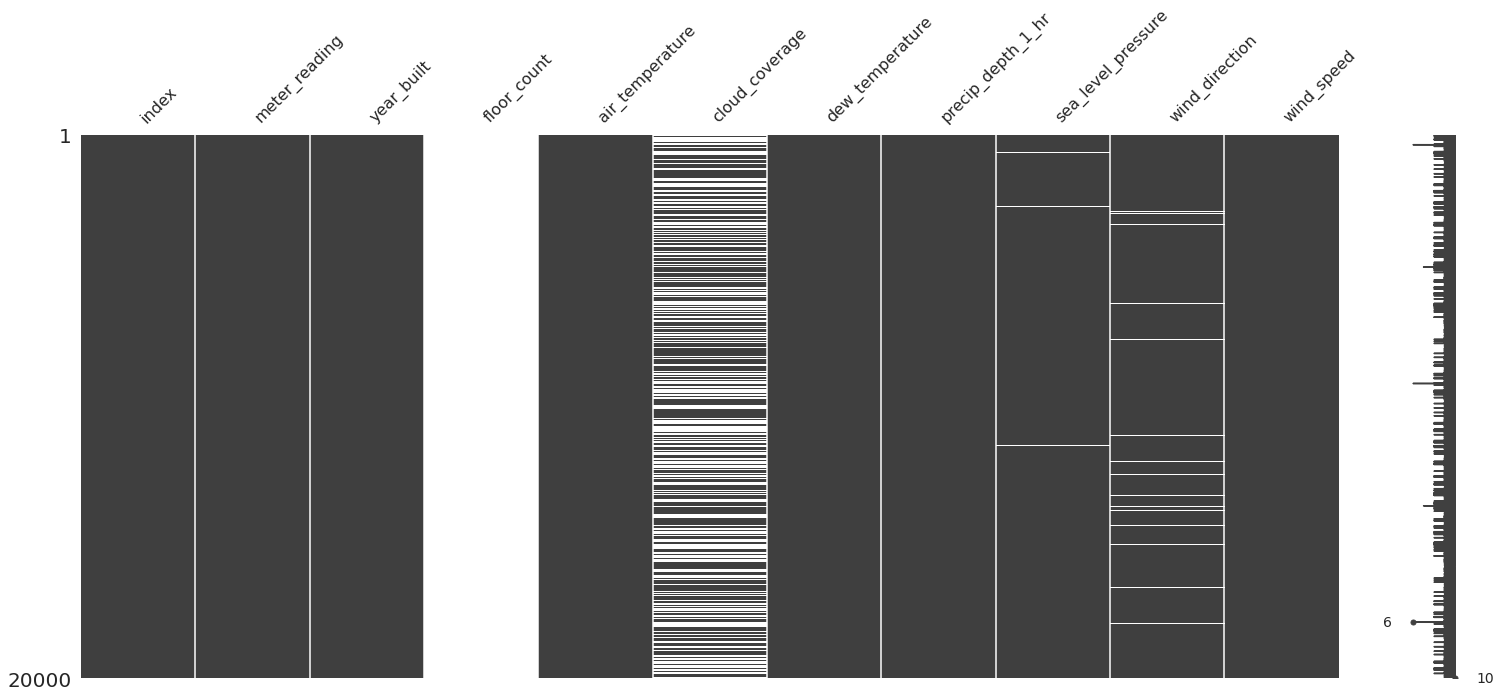

In [ ]:
msno.matrix(train_df.head(20000))

De la grafica podemos sacar rapidamente la cantidad de datos faltantes por variable como por ejemplo la variable'floor_count' se puede apreciar que tiene una gran catidad, luego se ve a 'cloud_coverage' en segundo lugar y 'wind_direction' con una menor cantidad.

Funcion: missing_table

In [ ]:
def missing_table(data_name):
    non_null_counts = data_name.count() # cuantos valores no nulos hay en la columna
    null_counts = data_name.isnull().sum() # cuantos valores nulos hay en la columna
    total_counts = non_null_counts+null_counts # cuantos recuentos totales
    percent_missing= round(100*null_counts/total_counts,1)
    min_non_null = data_name.min()
    median_non_null = data_name.quantile(q=0.5)
    max_non_null = data_name.max()
    missing_data=pd.concat([total_counts,non_null_counts,
                            null_counts,percent_missing,
                            min_non_null,median_non_null,
                            max_non_null],
                           axis=1,
                           keys=['Total Counts','Non-Null Counts',
                                 'Null Counts','Percent Missing(%)',
                                 'Non-Null Minimum','Non-Null Median',
                                 'Non-Null Maximum'])
    return missing_data

missing_list_train = train_df.columns
missing_list_test = test_df.columns

Examino la tabla de valores faltantes de los datos train_df:

In [ ]:
missing_table(pd.DataFrame(train_df[missing_list_train]))

Total Counts  Non-Null Counts  Null Counts  \
index                   20719338         20216100       503238   
meter_reading           20719338         20216100       503238   
year_built              20719338          8088455     12630883   
floor_count             20719338          3506933     17212405   
air_temperature         20719338         20119442       599896   
cloud_coverage          20719338         11390735      9328603   
dew_temperature         20719338         20115960       603378   
precip_depth_1_hr       20719338         16467077      4252261   
sea_level_pressure      20719338         18984431      1734907   
wind_direction          20719338         18767052      1952286   
wind_speed              20719338         20072424       646914   

                    Percent Missing(%)  Non-Null Minimum  Non-Null Median  \
index                              2.4           0.00000     1.010805e+07   
meter_reading                      2.4           0.00000     7.509000e+01   
year_built                        61.0        1900.00000     1.969000e+03   
floor_count                       83.1           1.00000     3.000000e+00   
air_temperature                    2.9         -28.90625     1.670312e+01   
cloud_coverage                    45.0           0.00000     0.000000e+00   
dew_temperature                    2.9         -35.00000     8.898438e+00   
precip_depth_1_hr                 20.5          -1.00000     0.000000e+00   
sea_level_pressure                 8.4         968.00000     1.016000e+03   
wind_direction                     9.4           0.00000     1.800000e+02   
wind_speed                         3.1           0.00000     3.099609e+00   

                    Non-Null Maximum  
index                   2.021610e+07  
meter_reading           2.190470e+07  
year_built              2.017000e+03  
floor_count             2.600000e+01  
air_temperature         4.718750e+01  
cloud_coverage          9.000000e+00  
dew_temperature         2.609375e+01  
precip_depth_1_hr       3.430000e+02  
sea_level_pressure      1.046000e+03  
wind_direction          3.600000e+02  
wind_speed              1.900000e+01

Examino la tabla de valores faltantes de los datos test_df:

In [ ]:
missing_table(pd.DataFrame(test_df[missing_list_test]))

Total Counts  Non-Null Counts  Null Counts  \
index                   41697600         41697600            0   
row_id                  41697600         41697600            0   
year_built              41697600         17099520     24598080   
floor_count             41697600          7253280     34444320   
air_temperature         41697600         41475699       221901   
cloud_coverage          41697600         22155420     19542180   
dew_temperature         41697600         41436801       260799   
precip_depth_1_hr       41697600         33896037      7801563   
sea_level_pressure      41697600         39180774      2516826   
wind_direction          41697600         38718937      2978663   
wind_speed              41697600         41395511       302089   

                    Percent Missing(%)  Non-Null Minimum  Non-Null Median  \
index                              0.0           0.00000     2.084880e+07   
row_id                             0.0           0.00000     2.084880e+07   
year_built                        59.0        1900.00000     1.969000e+03   
floor_count                       82.6           1.00000     3.000000e+00   
air_temperature                    0.5         -28.09375     1.670312e+01   
cloud_coverage                    46.9           0.00000     2.000000e+00   
dew_temperature                    0.6         -31.59375     8.898438e+00   
precip_depth_1_hr                 18.7          -1.00000     0.000000e+00   
sea_level_pressure                 6.0         972.00000     1.016000e+03   
wind_direction                     7.1           0.00000     1.800000e+02   
wind_speed                         0.7           0.00000     3.099609e+00   

                    Non-Null Maximum  
index                   4.169760e+07  
row_id                  4.169760e+07  
year_built              2.017000e+03  
floor_count             2.600000e+01  
air_temperature         4.831250e+01  
cloud_coverage          9.000000e+00  
dew_temperature         2.670312e+01  
precip_depth_1_hr       5.970000e+02  
sea_level_pressure      1.050000e+03  
wind_direction          3.600000e+02  
wind_speed              2.420312e+01

Después de unir el conjunto de datos, algunas de las columnas contienen un gran porcentaje de valores faltantes, como 'floor_count' y 'year_bulit'. Se puede verificar aún más la información del conjunto de datos.

In [ ]:
train_df.head(2)

index  \
building_id meter site_id primary_use square_meter timestamp                     
0           1     0       0           668.88       2016-01-01 00:00:00     0.0   
                                                   2016-01-01 01:00:00  2301.0   

                                                                        meter_reading  \
building_id meter site_id primary_use square_meter timestamp                            
0           1     0       0           668.88       2016-01-01 00:00:00            0.0   
                                                   2016-01-01 01:00:00            0.0   

                                                                        year_built  \
building_id meter site_id primary_use square_meter timestamp                         
0           1     0       0           668.88       2016-01-01 00:00:00      2008.0   
                                                   2016-01-01 01:00:00      2008.0   

                                                                        floor_count  \
building_id meter site_id primary_use square_meter timestamp                          
0           1     0       0           668.88       2016-01-01 00:00:00          NaN   
                                                   2016-01-01 01:00:00          NaN   

                                                                        air_temperature  \
building_id meter site_id primary_use square_meter timestamp                              
0           1     0       0           668.88       2016-01-01 00:00:00         25.00000   
                                                   2016-01-01 01:00:00         24.40625   

                                                                        cloud_coverage  \
building_id meter site_id primary_use square_meter timestamp                             
0           1     0       0           668.88       2016-01-01 00:00:00             6.0   
                                                   2016-01-01 01:00:00             NaN   

                                                                        dew_temperature  \
building_id meter site_id primary_use square_meter timestamp                              
0           1     0       0           668.88       2016-01-01 00:00:00         20.00000   
                                                   2016-01-01 01:00:00         21.09375   

                                                                        precip_depth_1_hr  \
building_id meter site_id primary_use square_meter timestamp                                
0           1     0       0           668.88       2016-01-01 00:00:00                NaN   
                                                   2016-01-01 01:00:00               -1.0   

                                                                        sea_level_pressure  \
building_id meter site_id primary_use square_meter timestamp                                 
0           1     0       0           668.88       2016-01-01 00:00:00              1019.5   
                                                   2016-01-01 01:00:00              1020.0   

                                                                        wind_direction  \
building_id meter site_id primary_use square_meter timestamp                             
0           1     0       0           668.88       2016-01-01 00:00:00             0.0   
                                                   2016-01-01 01:00:00            70.0   

                                                                        wind_speed  
building_id meter site_id primary_use square_meter timestamp                        
0           1     0       0           668.88       2016-01-01 00:00:00         0.0  
                                                   2016-01-01 01:00:00         1.5

2.1.3 Limpieza de valores faltantes. 

In [ ]:
# Luego de anlizar la tabla de valores faltantes descarto las columnas con más del 65% de datos faltantes 
thresh = len(train_df)*.35
train_df.dropna(thresh = thresh, axis = 1, inplace = True)
print(thresh)

thresh = len(test_df)*.35
test_df.dropna(thresh = thresh, axis = 1, inplace = True)
print(thresh)

7251768.3
14594160.0


Al observar la grafica de la matriz de nulidad la variable 'floor_count' la elimino por la cantidad de datos faltantes que tiene de origen, considerando que no influye en el analisis dado que teniendo el area del edificio no importa la catidad de niveles.
El resto de variables se consideran importantes y estan algunas correlacionadas con el consumo electrico.





fillna(), realizar un seguimiento del índice original para referencia.

In [ ]:

train_df['index'].fillna(-1, inplace = True)
train_df['original_index']=train_df['index'].astype('int32')
train_df.drop(['index'],axis=1,inplace=True)


In [ ]:

test_df['index'].fillna(-1, inplace = True)
test_df['original_index']=test_df['index'].astype('int32')
test_df.drop(['index','row_id'],axis=1,inplace=True)


2.1.4 Interpolando los datos faltantes, interpolate().

In [ ]:

for name in list(train_df):
    if name == 'meter_reading':
        train_df['meter_reading']=train_df['meter_reading'].interpolate()
    if name == 'air_temperature':
        train_df['air_temperature']=train_df['air_temperature'].interpolate()
    if name == 'dew_temperature':
        train_df['dew_temperature']=train_df['dew_temperature'].interpolate()
    if name == 'cloud_coverage':
        train_df['cloud_coverage']=train_df['cloud_coverage'].interpolate()
    if name == 'precip_depth_1_hr':
        train_df['precip_depth_1_hr']=train_df['precip_depth_1_hr'].interpolate()
    if name == 'sea_level_pressure':
        train_df['sea_level_pressure']=train_df['sea_level_pressure'].interpolate()
    if name == 'wind_direction':
        train_df['wind_direction']=train_df['wind_direction'].interpolate()
    if name == 'wind_speed':
        train_df['wind_speed']=train_df['wind_speed'].interpolate()
        
for name in list(test_df):
    if name == 'air_temperature':
        test_df['air_temperature']=test_df['air_temperature'].interpolate()
    if name == 'dew_temperature':
        test_df['dew_temperature']=test_df['dew_temperature'].interpolate()
    if name == 'cloud_coverage':
        test_df['cloud_coverage']=test_df['cloud_coverage'].interpolate()
    if name == 'precip_depth_1_hr':
        test_df['precip_depth_1_hr']=test_df['precip_depth_1_hr'].interpolate()
    if name == 'sea_level_pressure':
        test_df['sea_level_pressure']=test_df['sea_level_pressure'].interpolate()
    if name == 'wind_direction':
        test_df['wind_direction']=test_df['wind_direction'].interpolate()
    if name == 'wind_speed':
        test_df['wind_speed']=test_df['wind_speed'].interpolate()

In [ ]:
train_df.isnull().sum()

meter_reading                0
year_built            12630883
air_temperature              0
cloud_coverage               0
dew_temperature              0
precip_depth_1_hr            1
sea_level_pressure           0
wind_direction               0
wind_speed                   0
original_index               0
dtype: int64

In [ ]:

test_df.isnull().sum()

year_built            24598080
air_temperature              0
cloud_coverage               0
dew_temperature              0
precip_depth_1_hr            1
sea_level_pressure           0
wind_direction               0
wind_speed                   0
original_index               0
dtype: int64

Pad()

In [ ]:

train_df=train_df.groupby(grouplist).pad()
test_df=test_df.groupby(grouplist).pad()

In [ ]:

train_df.head()

meter_reading  \
building_id meter site_id primary_use square_meter timestamp                            
0           1     0       0           668.88       2016-01-01 00:00:00            0.0   
                                                   2016-01-01 01:00:00            0.0   
                                                   2016-01-01 02:00:00            0.0   
                                                   2016-01-01 03:00:00            0.0   
                                                   2016-01-01 04:00:00            0.0   

                                                                        year_built  \
building_id meter site_id primary_use square_meter timestamp                         
0           1     0       0           668.88       2016-01-01 00:00:00      2008.0   
                                                   2016-01-01 01:00:00      2008.0   
                                                   2016-01-01 02:00:00      2008.0   
                                                   2016-01-01 03:00:00      2008.0   
                                                   2016-01-01 04:00:00      2008.0   

                                                                        air_temperature  \
building_id meter site_id primary_use square_meter timestamp                              
0           1     0       0           668.88       2016-01-01 00:00:00        25.000000   
                                                   2016-01-01 01:00:00        24.406250   
                                                   2016-01-01 02:00:00        22.796875   
                                                   2016-01-01 03:00:00        21.093750   
                                                   2016-01-01 04:00:00        20.000000   

                                                                        cloud_coverage  \
building_id meter site_id primary_use square_meter timestamp                             
0           1     0       0           668.88       2016-01-01 00:00:00             6.0   
                                                   2016-01-01 01:00:00             4.0   
                                                   2016-01-01 02:00:00             2.0   
                                                   2016-01-01 03:00:00             2.0   
                                                   2016-01-01 04:00:00             2.0   

                                                                        dew_temperature  \
building_id meter site_id primary_use square_meter timestamp                              
0           1     0       0           668.88       2016-01-01 00:00:00         20.00000   
                                                   2016-01-01 01:00:00         21.09375   
                                                   2016-01-01 02:00:00         21.09375   
                                                   2016-01-01 03:00:00         20.59375   
                                                   2016-01-01 04:00:00         20.00000   

                                                                        precip_depth_1_hr  \
building_id meter site_id primary_use square_meter timestamp                                
0           1     0       0           668.88       2016-01-01 00:00:00                NaN   
                                                   2016-01-01 01:00:00               -1.0   
                                                   2016-01-01 02:00:00                0.0   
                                                   2016-01-01 03:00:00                0.0   
                                                   2016-01-01 04:00:00               -1.0   

                                                                        sea_level_pressure  \
building_id meter site_id primary_use square_meter timestamp                                 
0           1     0       0           668.88       2016-01-01 00:00:00              1019.5   
    

In [ ]:
train_df.isnull().sum()

meter_reading                0
year_built            12283169
air_temperature              0
cloud_coverage               0
dew_temperature              0
precip_depth_1_hr            1
sea_level_pressure           0
wind_direction               0
wind_speed                   0
original_index               0
dtype: int64

In [ ]:

test_df.isnull().sum()

year_built            24598080
air_temperature              0
cloud_coverage               0
dew_temperature              0
precip_depth_1_hr            1
sea_level_pressure           0
wind_direction               0
wind_speed                   0
original_index               0
dtype: int64

Despues de la limpieza de datos solo queda limpiar la variable 'year_built'

bfill()

In [ ]:
train_df=train_df.groupby(grouplist).bfill()
test_df=test_df.groupby(grouplist).bfill()
train_df=train_df.reset_index()
test_df=test_df.reset_index()
train_df.head()

building_id  meter  site_id  primary_use  square_meter           timestamp  \
0            0      1        0            0        668.88 2016-01-01 00:00:00   
1            0      1        0            0        668.88 2016-01-01 01:00:00   
2            0      1        0            0        668.88 2016-01-01 02:00:00   
3            0      1        0            0        668.88 2016-01-01 03:00:00   
4            0      1        0            0        668.88 2016-01-01 04:00:00   

   meter_reading  year_built  air_temperature  cloud_coverage  \
0            0.0      2008.0        25.000000             6.0   
1            0.0      2008.0        24.406250             4.0   
2            0.0      2008.0        22.796875             2.0   
3            0.0      2008.0        21.093750             2.0   
4            0.0      2008.0        20.000000             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0         20.00000               -1.0              1019.5             0.0   
1         21.09375               -1.0              1020.0            70.0   
2         21.09375                0.0              1020.0             0.0   
3         20.59375                0.0              1020.0             0.0   
4         20.00000               -1.0              1020.0           250.0   

   wind_speed  original_index  
0    0.000000               0  
1    1.500000            2301  
2    0.000000            4594  
3    0.000000            6893  
4    2.599609            9189

In [ ]:
   #Tratamiento de valores faltantes para la variable 'year_built' en ambos conjuntos de datos train_df y test_df
   missing_data_train_year_built = missing_table(pd.DataFrame(train_df['year_built']))
   replacement = float(missing_data_train_year_built['Non-Null Median'].values)
   train_df['year_built'].fillna(replacement, inplace = True)
   missing_data_test_year_built = missing_table(pd.DataFrame(test_df['year_built']))
   replacement = float(missing_data_test_year_built['Non-Null Median'].values)
   test_df['year_built'].fillna(replacement, inplace = True)

Compruebo que no hay mas datos faltantes

In [ ]:
train_df.isnull().sum()

building_id           0
meter                 0
site_id               0
primary_use           0
square_meter          0
timestamp             0
meter_reading         0
year_built            0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
original_index        0
dtype: int64

In [ ]:
test_df.isnull().sum()

building_id           0
meter                 0
site_id               0
primary_use           0
square_meter          0
timestamp             0
year_built            0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
original_index        0
dtype: int64

2.2 Busqueda de valores atipicos Outliers



Despues de hacer limpieza de datos se hara un analisis de la normalidad de los mismos, curtosis y probabilidad normal de tal manera que la distribucion de los datos debe ajustarse a la diagonal que representa la distribucion normal.

In [ ]:
train_df=reduce_mem_usage(train_df)
test_df=reduce_mem_usage(test_df)

Memoria usada disminuida a 810.14 Mb (43.1% reduccion)
Memoria usada disminuida a 1471.34 Mb (45.6% reduccion)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20719338 entries, 0 to 20719337
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   site_id             int8          
 3   primary_use         int8          
 4   square_meter        float32       
 5   timestamp           datetime64[ns]
 6   meter_reading       float32       
 7   year_built          float16       
 8   air_temperature     float16       
 9   cloud_coverage      float16       
 10  dew_temperature     float16       
 11  precip_depth_1_hr   float16       
 12  sea_level_pressure  float16       
 13  wind_direction      float16       
 14  wind_speed          float16       
 15  original_index      int32         
dtypes: datetime64[ns](1), float16(8), float32(2), int16(1), int32(1), int8(3)
memory usage: 810.1 MB


In [ ]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int16         
 1   meter               int8          
 2   site_id             int8          
 3   primary_use         int8          
 4   square_meter        float32       
 5   timestamp           datetime64[ns]
 6   year_built          float16       
 7   air_temperature     float16       
 8   cloud_coverage      float16       
 9   dew_temperature     float16       
 10  precip_depth_1_hr   float16       
 11  sea_level_pressure  float16       
 12  wind_direction      float16       
 13  wind_speed          float16       
 14  original_index      int32         
dtypes: datetime64[ns](1), float16(8), float32(1), int16(1), int32(1), int8(3)
memory usage: 1.4 GB


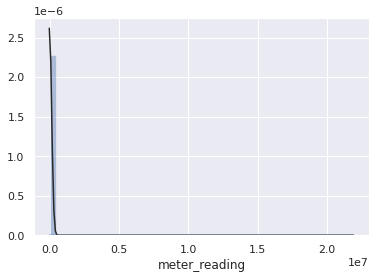

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.distplot(train_df['meter_reading'], fit=norm);
fig = plt.figure()


In [ ]:
##calculo la simetria 
print('Exceso de curtosis para una distribucion normal  debe ser "0" :')
print(skew(train_df['meter_reading']))
print('Asimetria de distribucion normal  debe ser "0" :')
print(kurtosis(train_df['meter_reading']))

Exceso de curtosis para una distribucion normal  debe ser "0" :
106.10706329345703
Asimetria de distribucion normal  debe ser "0" :
11962.370027070554


In [ ]:
# criterio para que la distribucion sea simetrica  moda=mediana=media.
print(st.mode(train_df['meter_reading']))
print(np.median(train_df['meter_reading']))
print(np.mean(train_df['meter_reading']))

ModeResult(mode=array([0.], dtype=float32), count=array([1909529]))
74.871
1992.271240234375


En base a los calculos anteriores la variable objetivo es totalmente asimetrica por lo que a esta variable se le dara un trato logaritmico como se vera mas adelante igualmente para otras variables que tienen el mismo comportamiento y que estan correlacionadas.

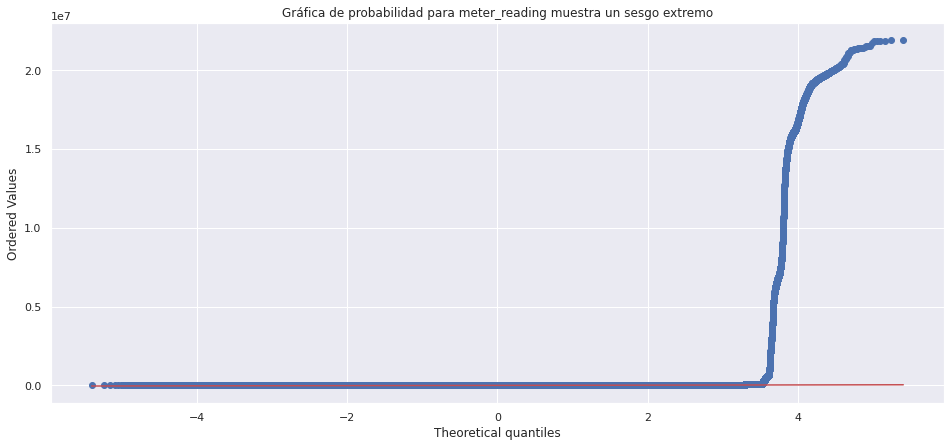

In [ ]:
plt.figure(figsize=(16,7))
_ = stats.probplot(train_df['meter_reading'], plot=plt)
plt.title("Gráfica de probabilidad para meter_reading muestra un sesgo extremo")
plt.show()

Del grafico se observa que no tiene una distribucion normal 'meter_reading , muestra asimetria positiva, mas adelante se tranformaran los datos para resolver este problema.

In [ ]:
energy_types_dict = {0: "electricity", 1: "chilledwater", 2: "steam", 3: "hotwater"}
energy_types      = ['electricity', 'chilledwater', 'steam', 'hotwater']

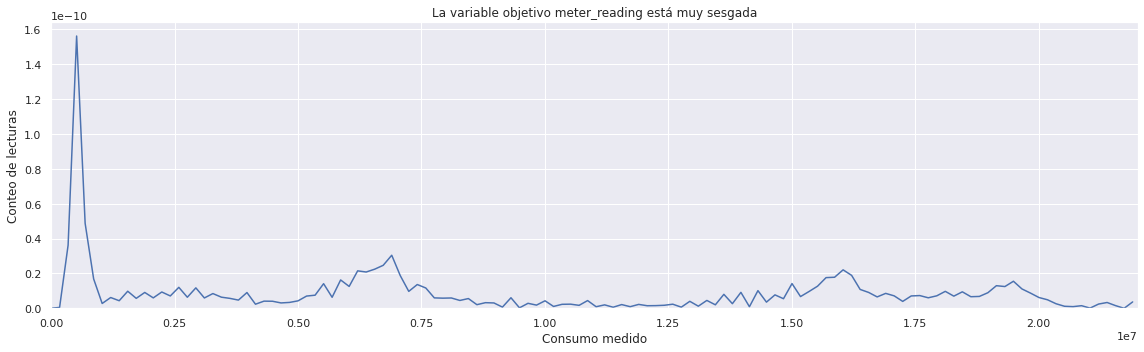

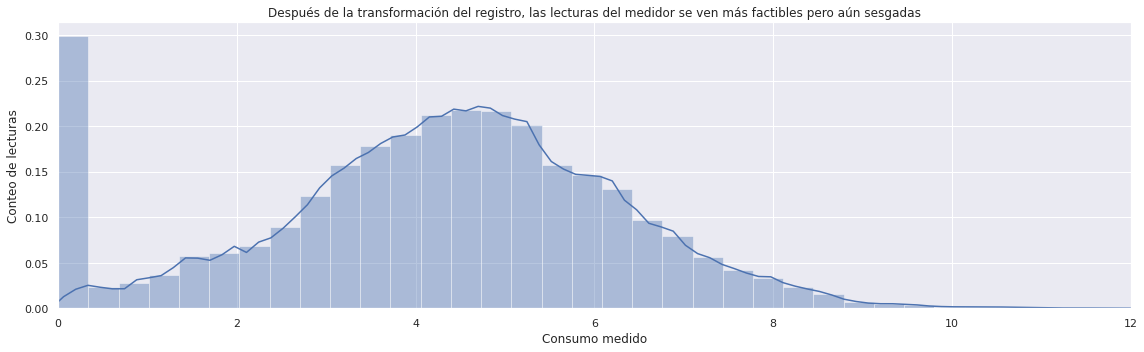

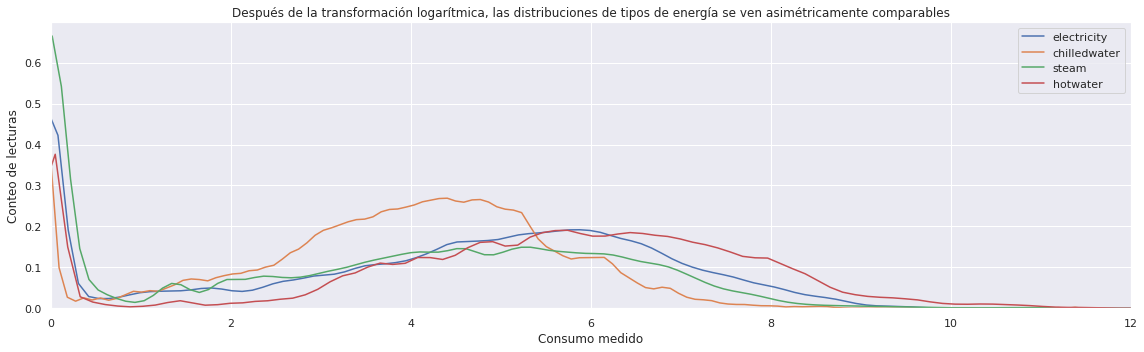

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(train_df.meter_reading, hist=False)
plt.title(f"La variable objetivo meter_reading está muy sesgada")
plt.ylabel("Conteo de lecturas")
plt.xlabel(f"Consumo medido")
plt.xlim(0, train_df.meter_reading.max() + 100_000)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
sns.distplot(np.log1p(train_df.meter_reading))
plt.title(f"Después de la transformación del registro, las lecturas del medidor se ven más factibles pero aún sesgadas")
plt.ylabel("Conteo de lecturas")
plt.xlabel(f"Consumo medido")
plt.xlim(0, 12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
for idx in range(0,4):
    sns.distplot(np.log1p(train_df[train_df.meter==idx].meter_reading), hist=False, label=energy_types[idx])
plt.title(f"Después de la transformación logarítmica, las distribuciones de tipos de energía se ven asimétricamente comparables")
plt.ylabel("Conteo de lecturas")
plt.xlabel(f"Consumo medido")
plt.legend()
plt.xlim(0, 12)
plt.tight_layout()
plt.show()

In [ ]:

def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(
        np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(
        np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

2.2.1 Deteccion de Outliers de la variable objetivo 'meter_reading'.

In [ ]:
print("{} percent of {} are outliers."
      .format((
              (100 * outlier_function(train_df, 'meter_reading')[2])
               / len(train_df['meter_reading'])),
              'meter_reading'))

8.201796794858986 percent of meter_reading are outliers.


In [ ]:
print("{} percent of {} are outliers."
      .format((
              (100 * outlier_function(train_df, 'dew_temperature')[2])
               / len(train_df['dew_temperature'])),
              'dew_temperature'))

0.0 percent of dew_temperature are outliers.


Se establece un umbral entre valores altos y bajos.
Lecturas del medidor con valores altos.
Lecturas del medidor de caída es más alta que 15,000 kWh

In [ ]:

train_df['meter_reading']

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
            ...  
20719333    3.400
20719334    2.700
20719335    3.050
20719336    3.125
20719337    2.850
Name: meter_reading, Length: 20719338, dtype: float32

In [ ]:
train_df=train_df.drop((train_df.loc[train_df['meter_reading'] > 1.5e+04])['meter_reading'].index)

In [ ]:
train_df['meter_reading']

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
            ...  
20719333    3.400
20719334    2.700
20719335    3.050
20719336    3.125
20719337    2.850
Name: meter_reading, Length: 20662152, dtype: float32

Caída de lecturas del medidor con valores cero.

In [ ]:
train_df=train_df.drop((train_df.loc[train_df['meter_reading'] == 0])['meter_reading'].index)

In [ ]:
train_df['meter_reading']

704          12.803751
725          11.003208
737          15.404486
2366         17.405069
2923        131.308807
               ...    
20719333      3.400000
20719334      2.700000
20719335      3.050000
20719336      3.125000
20719337      2.850000
Name: meter_reading, Length: 18752623, dtype: float32


2.3 Visualizacion de datos limpios

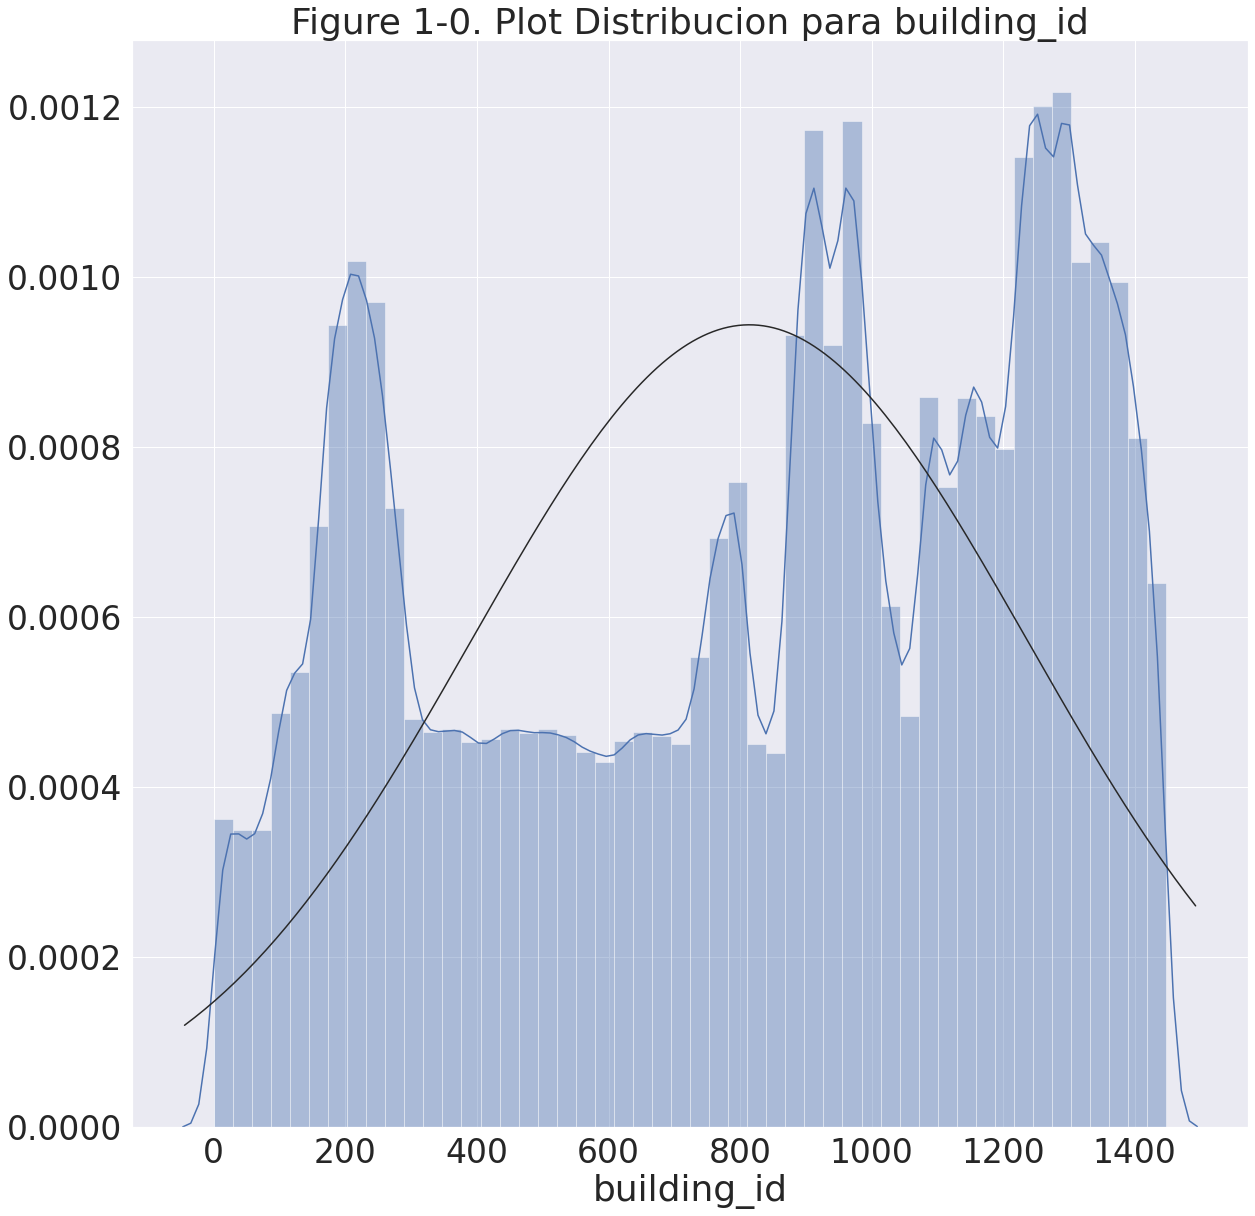

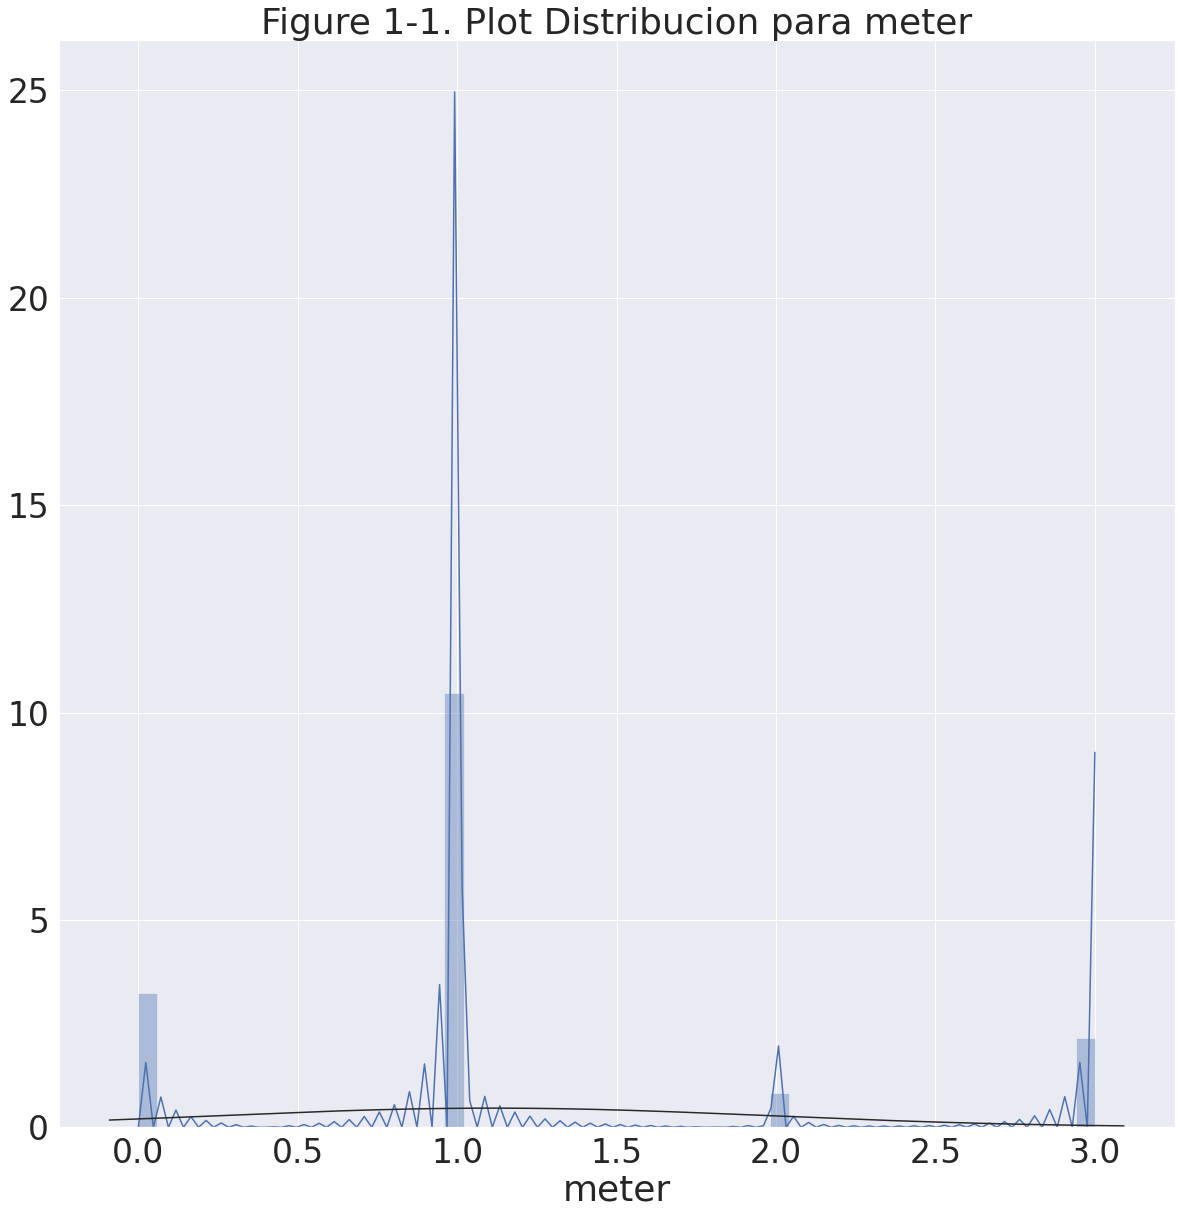

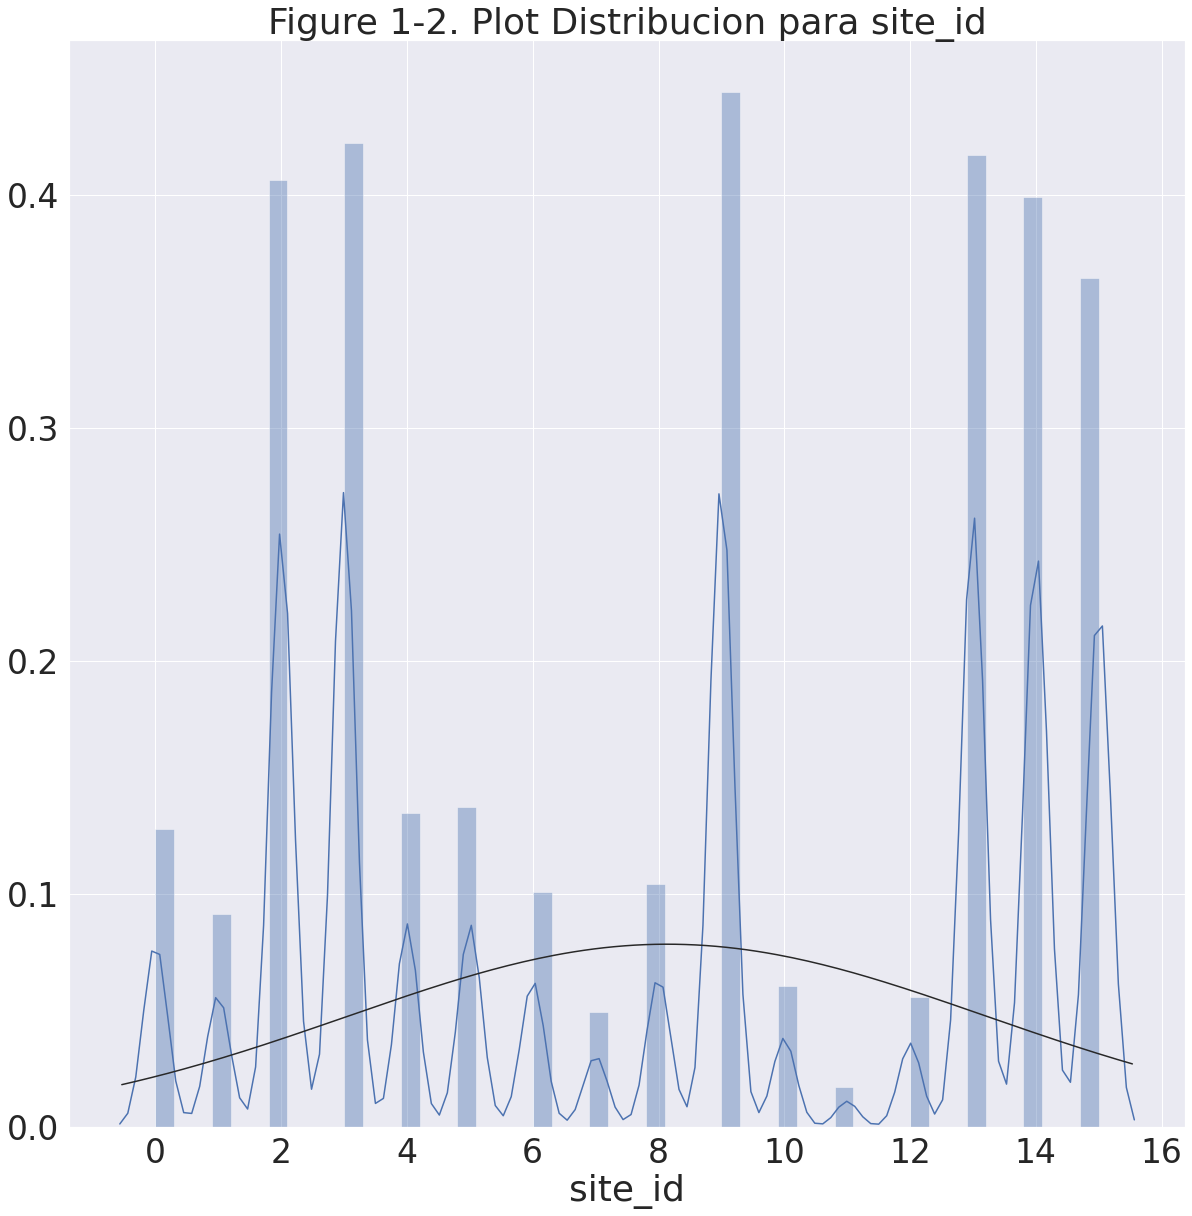

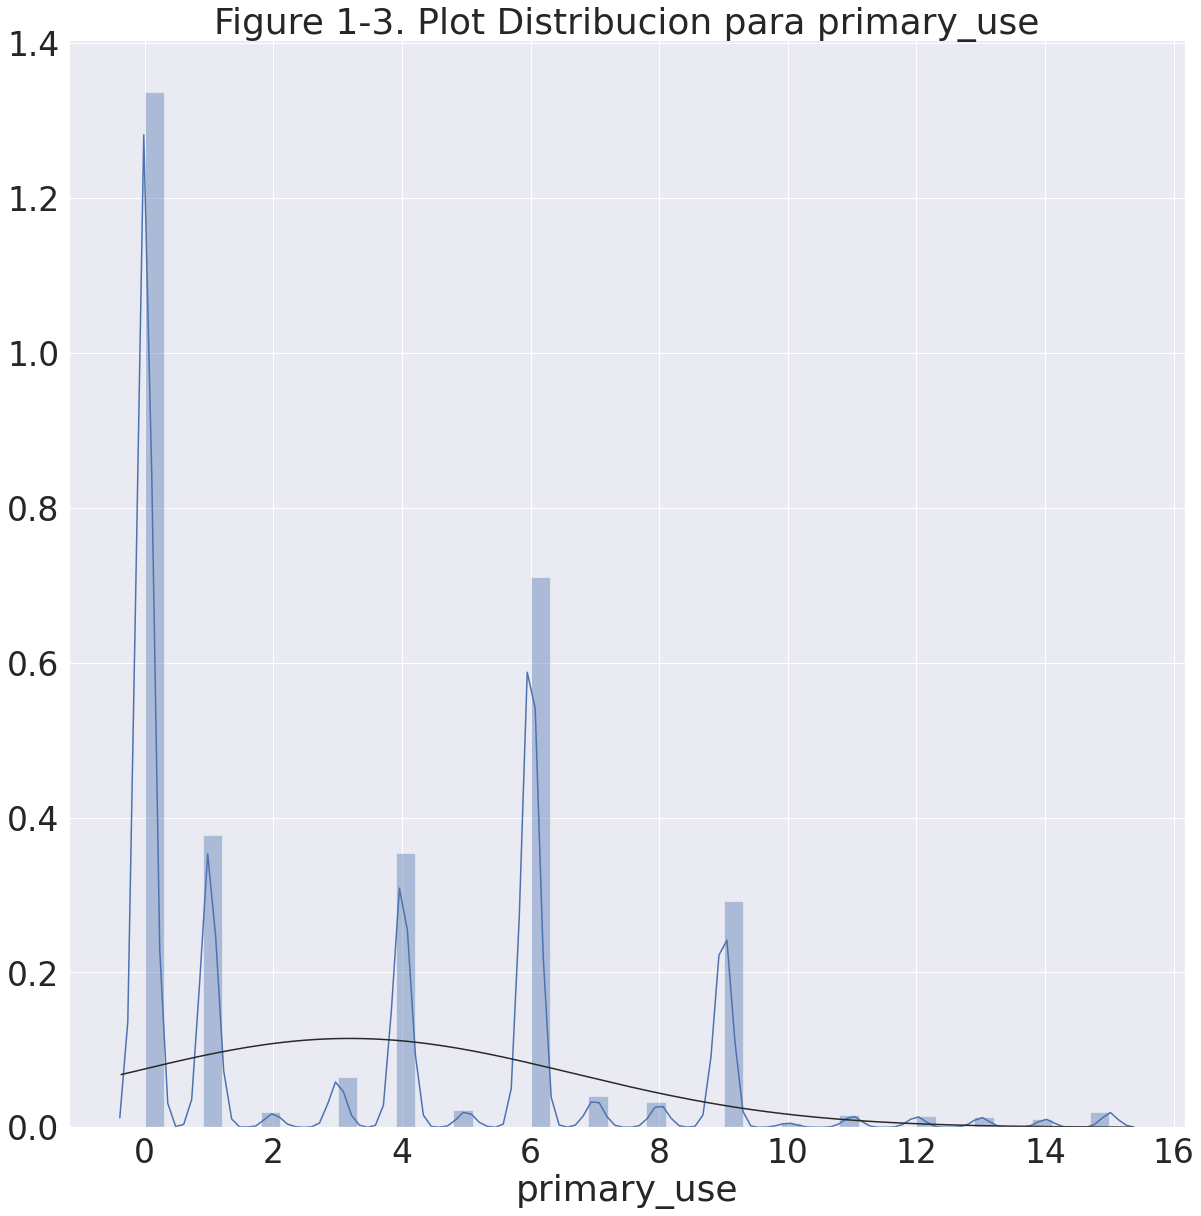

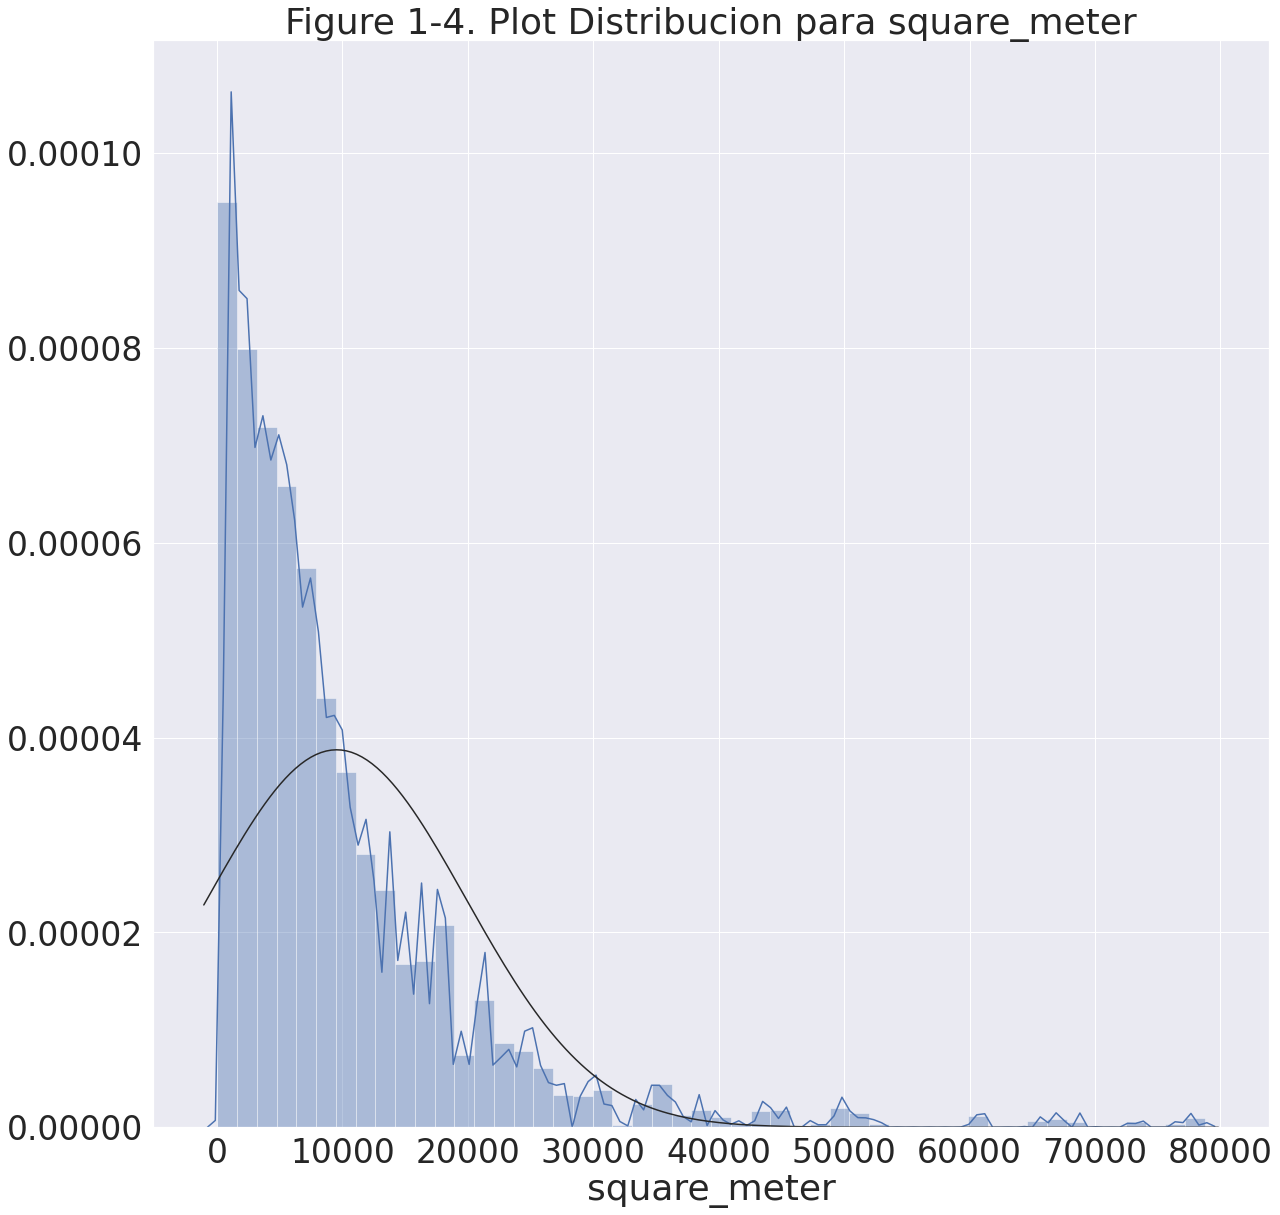

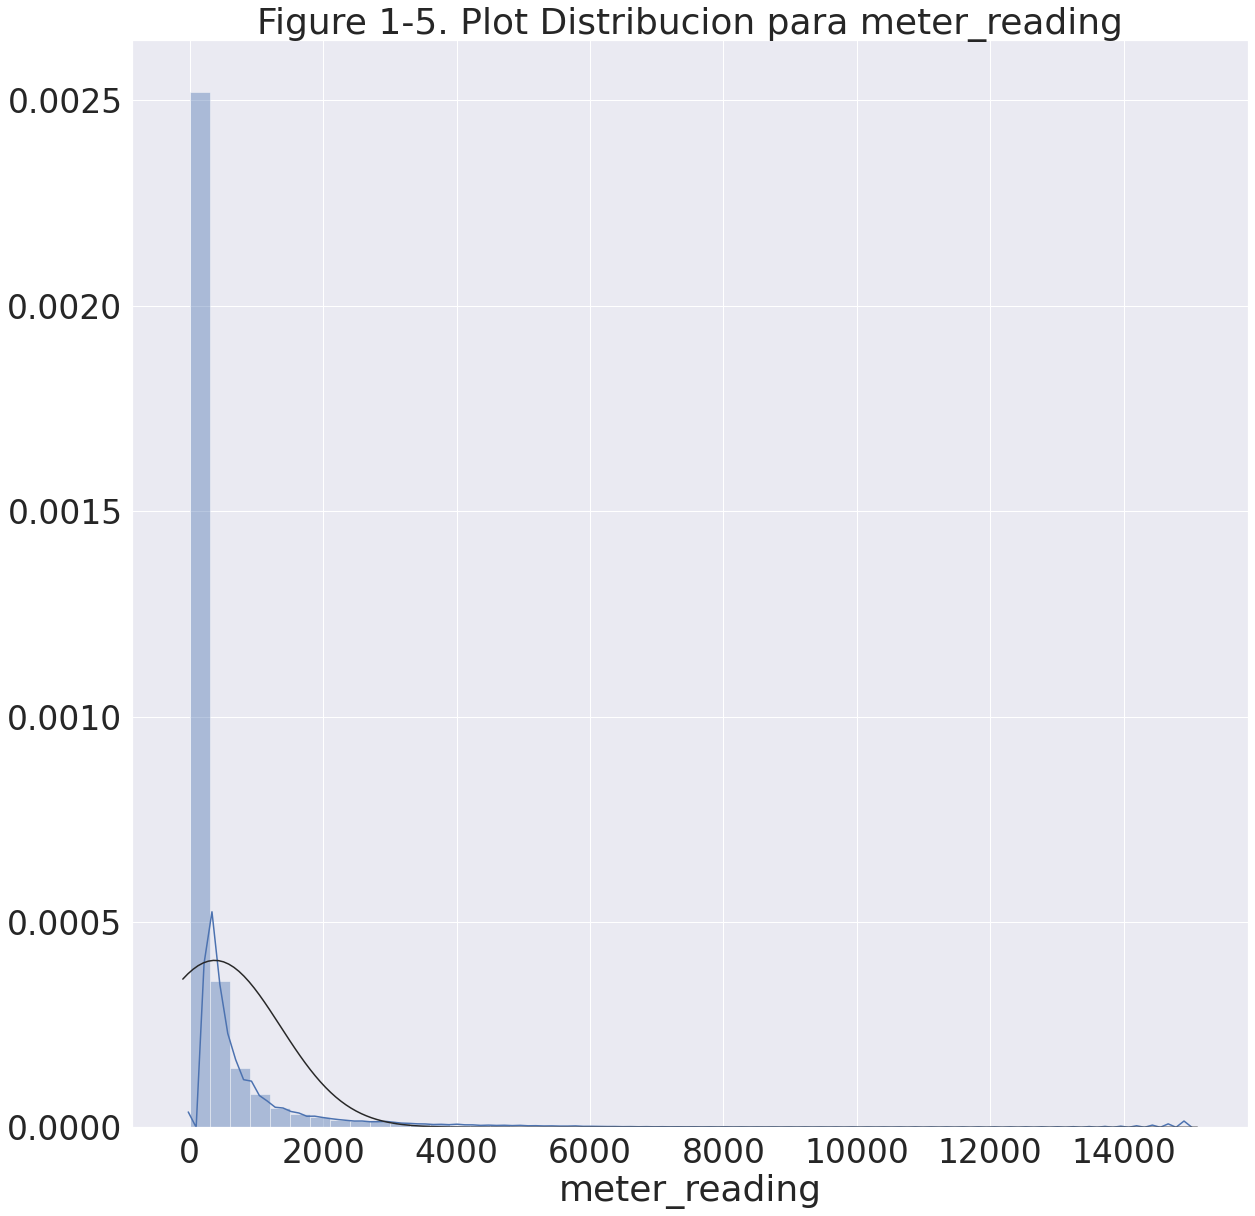

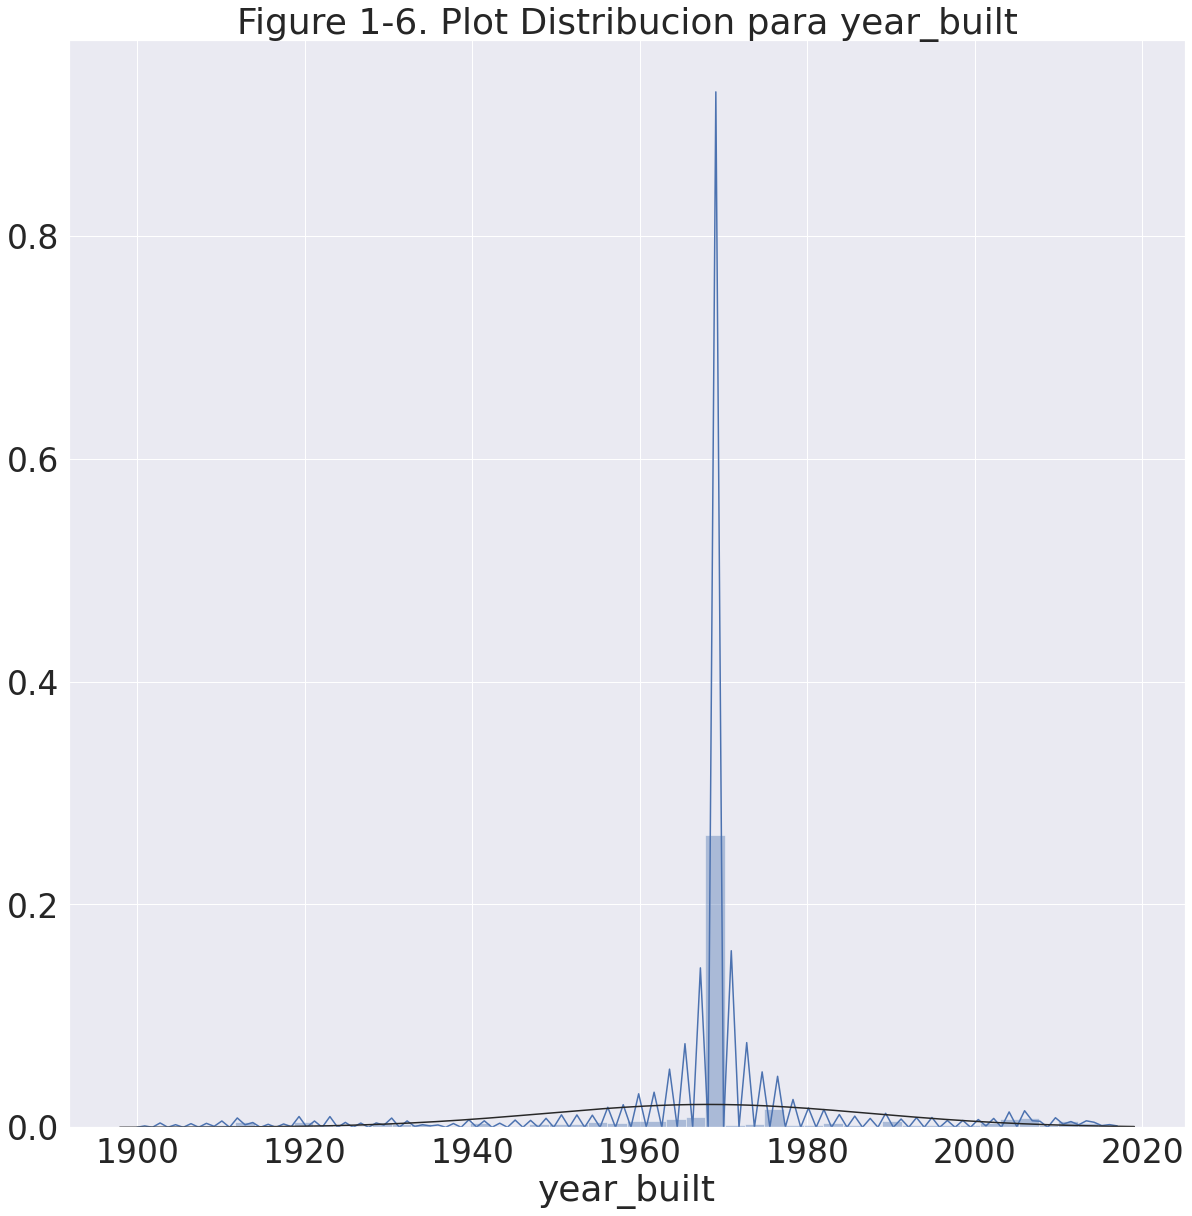

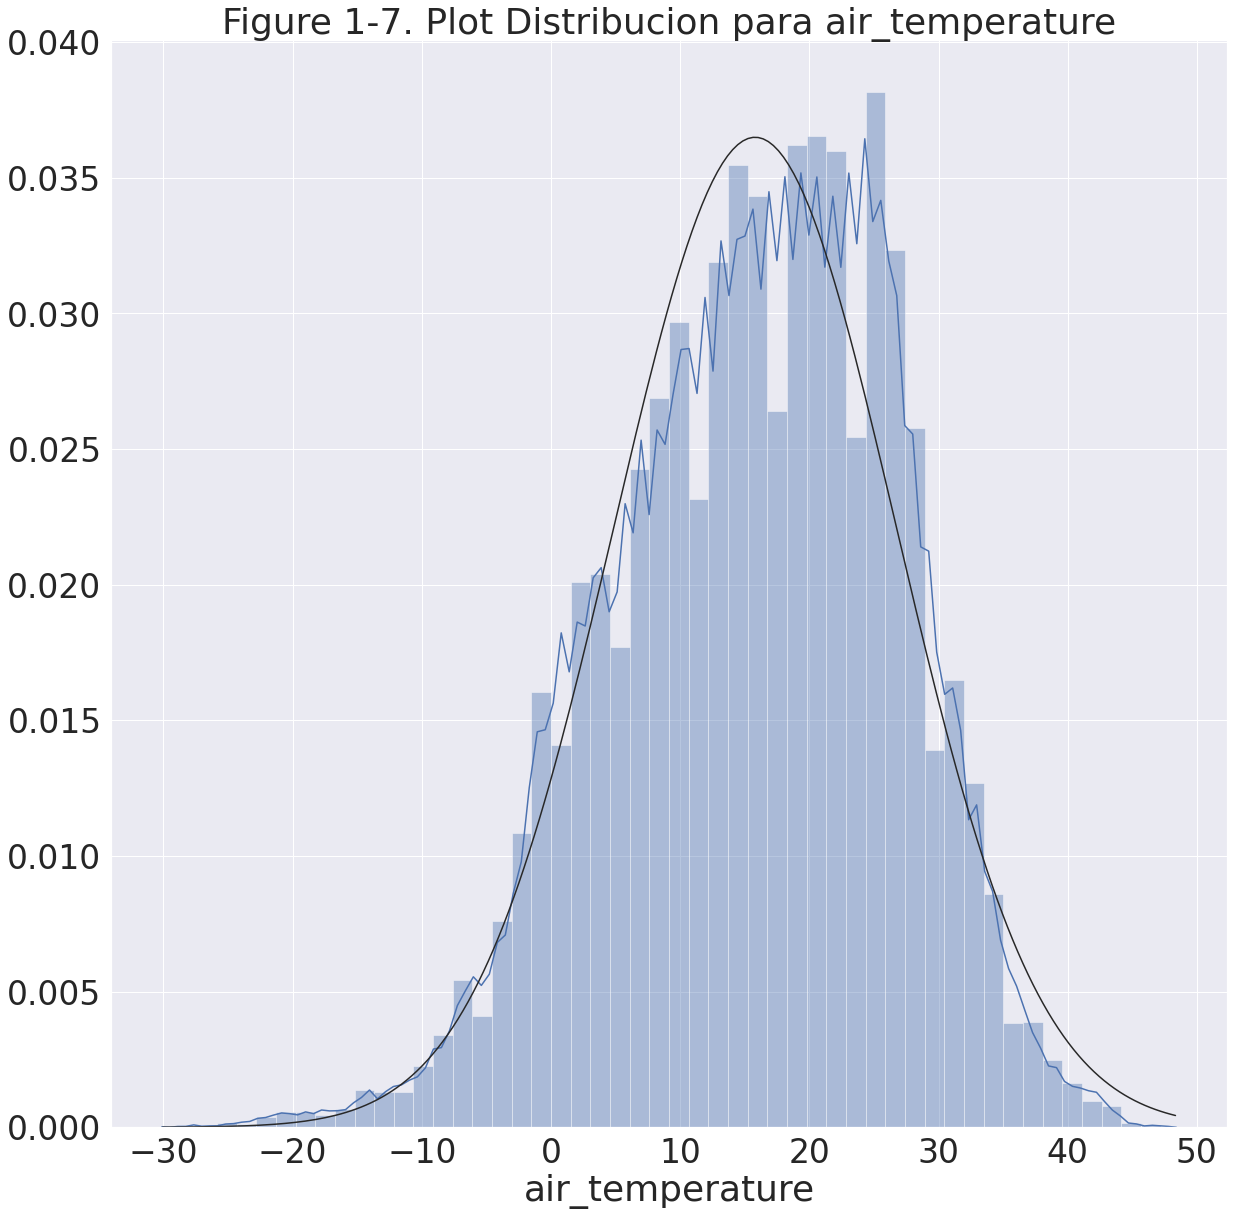

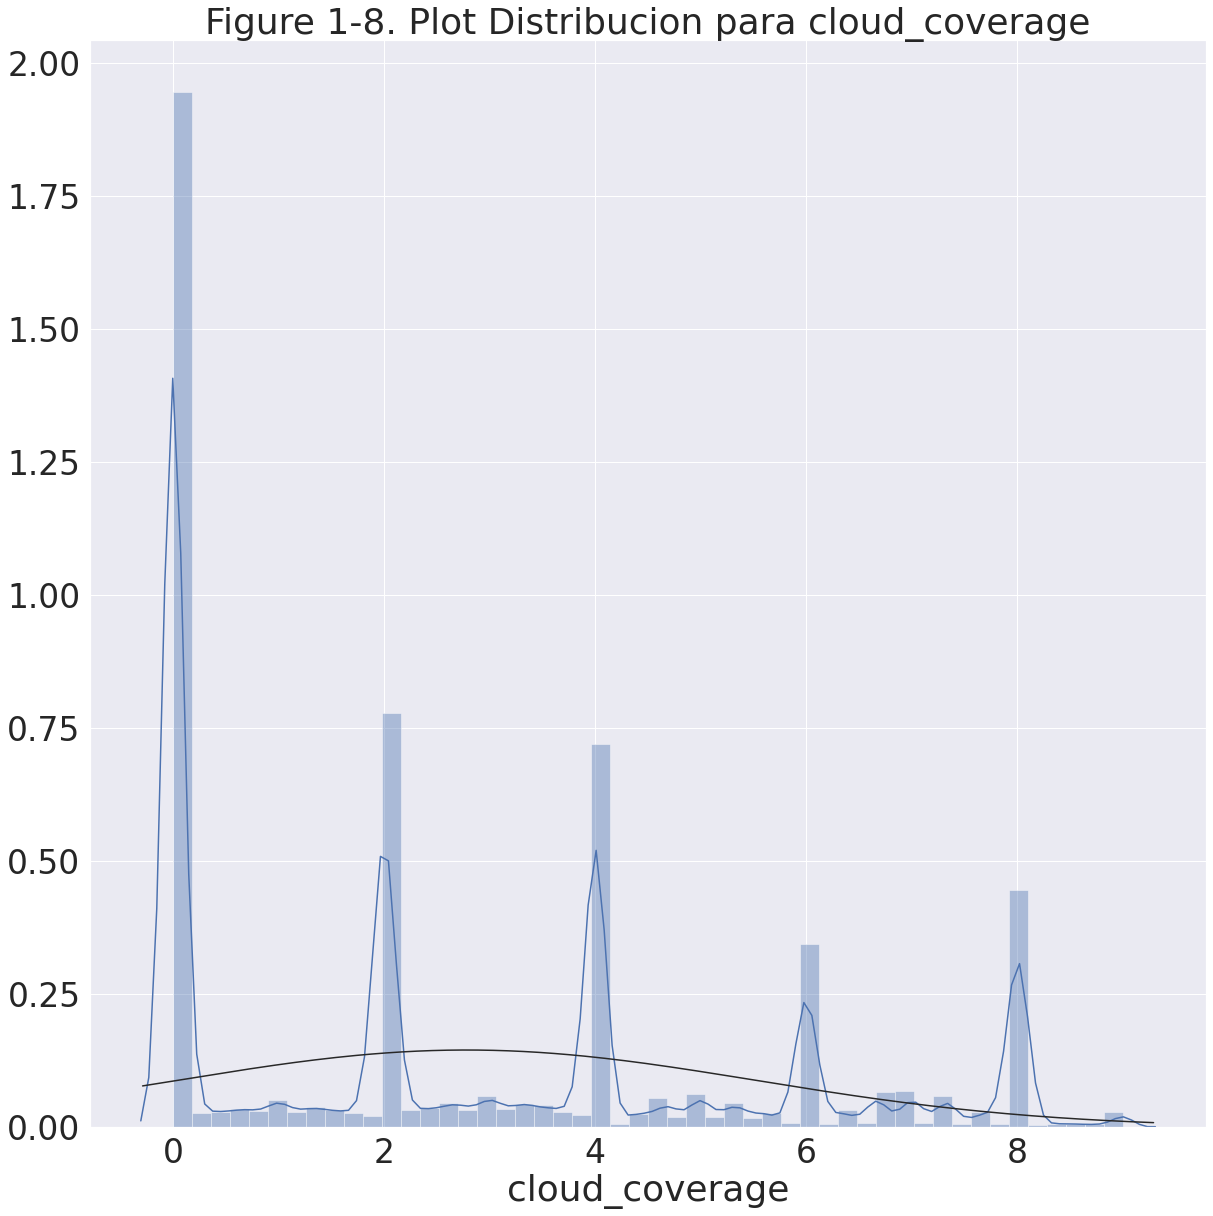

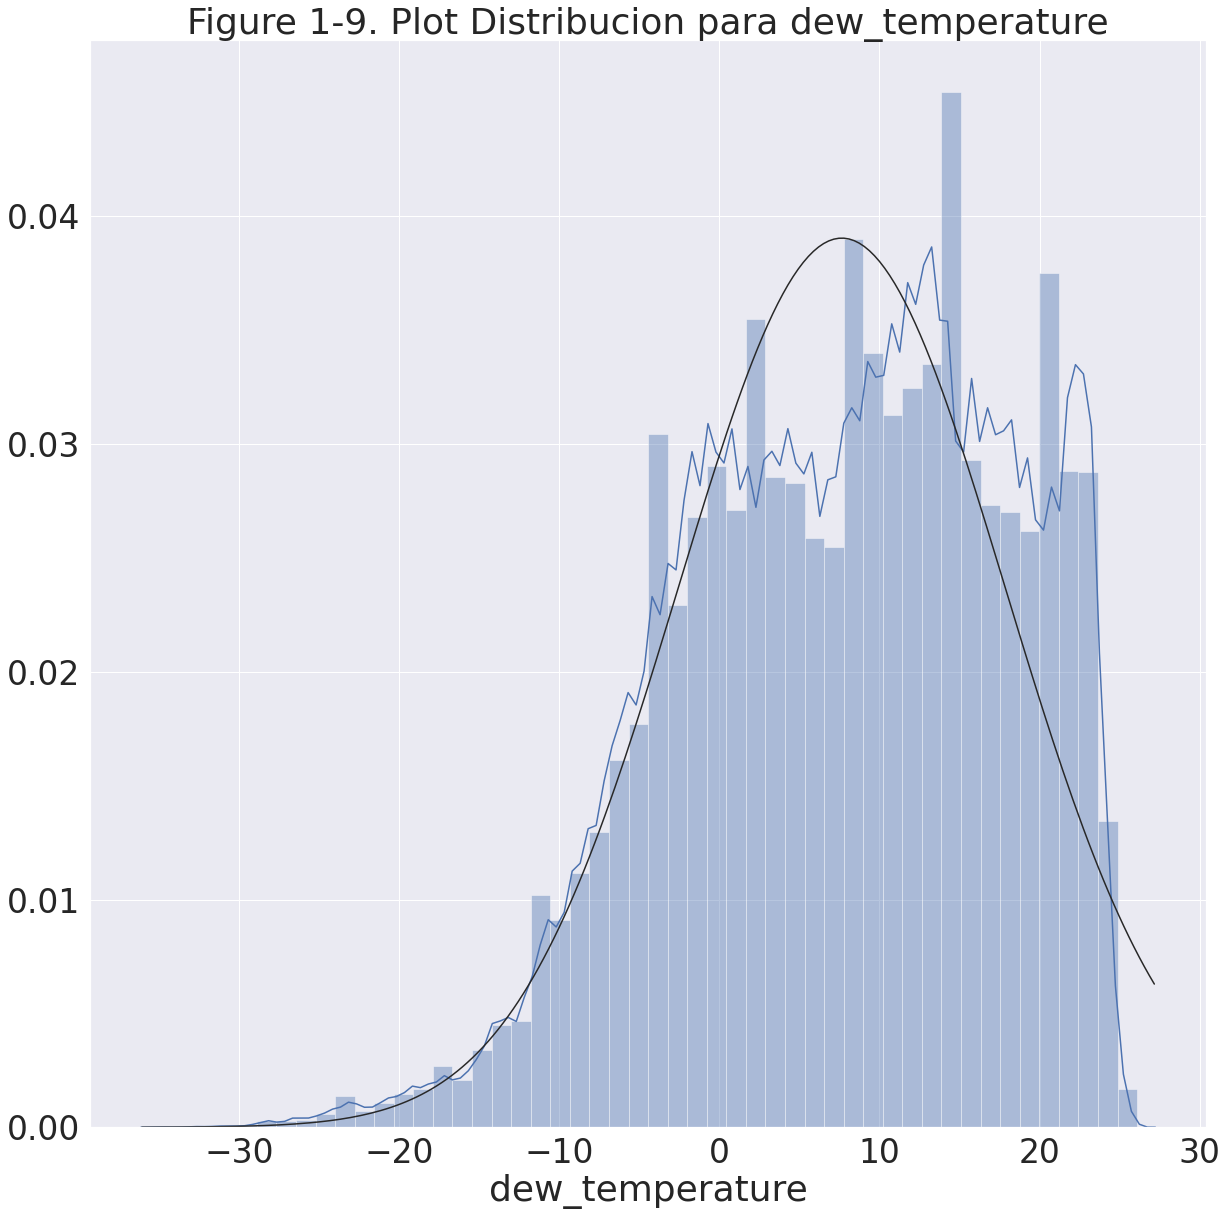

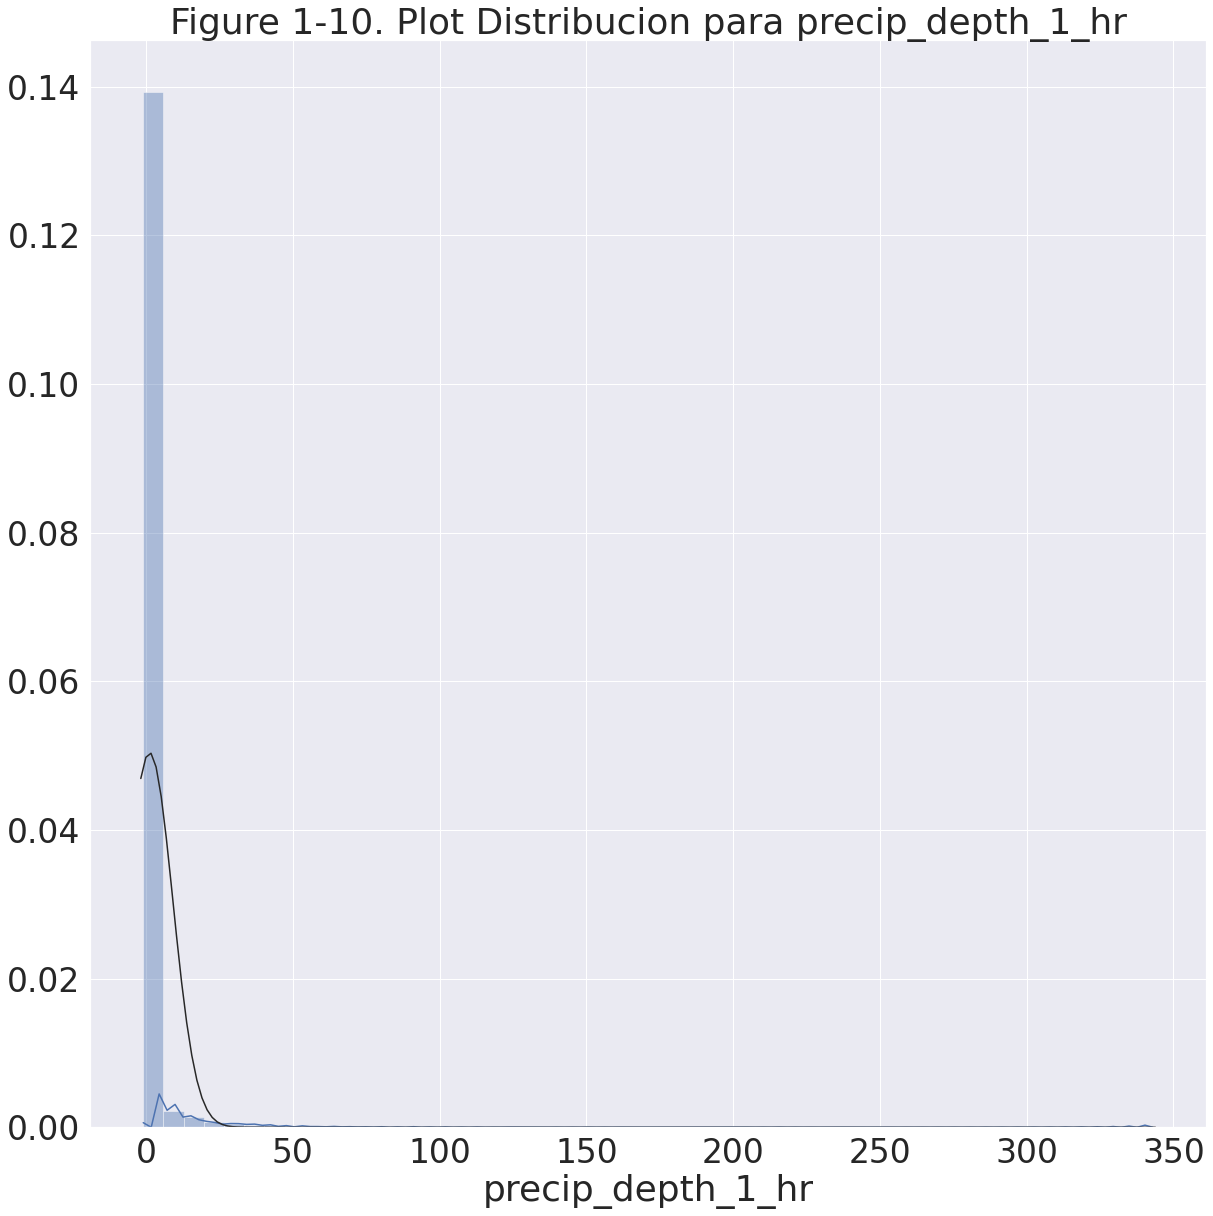

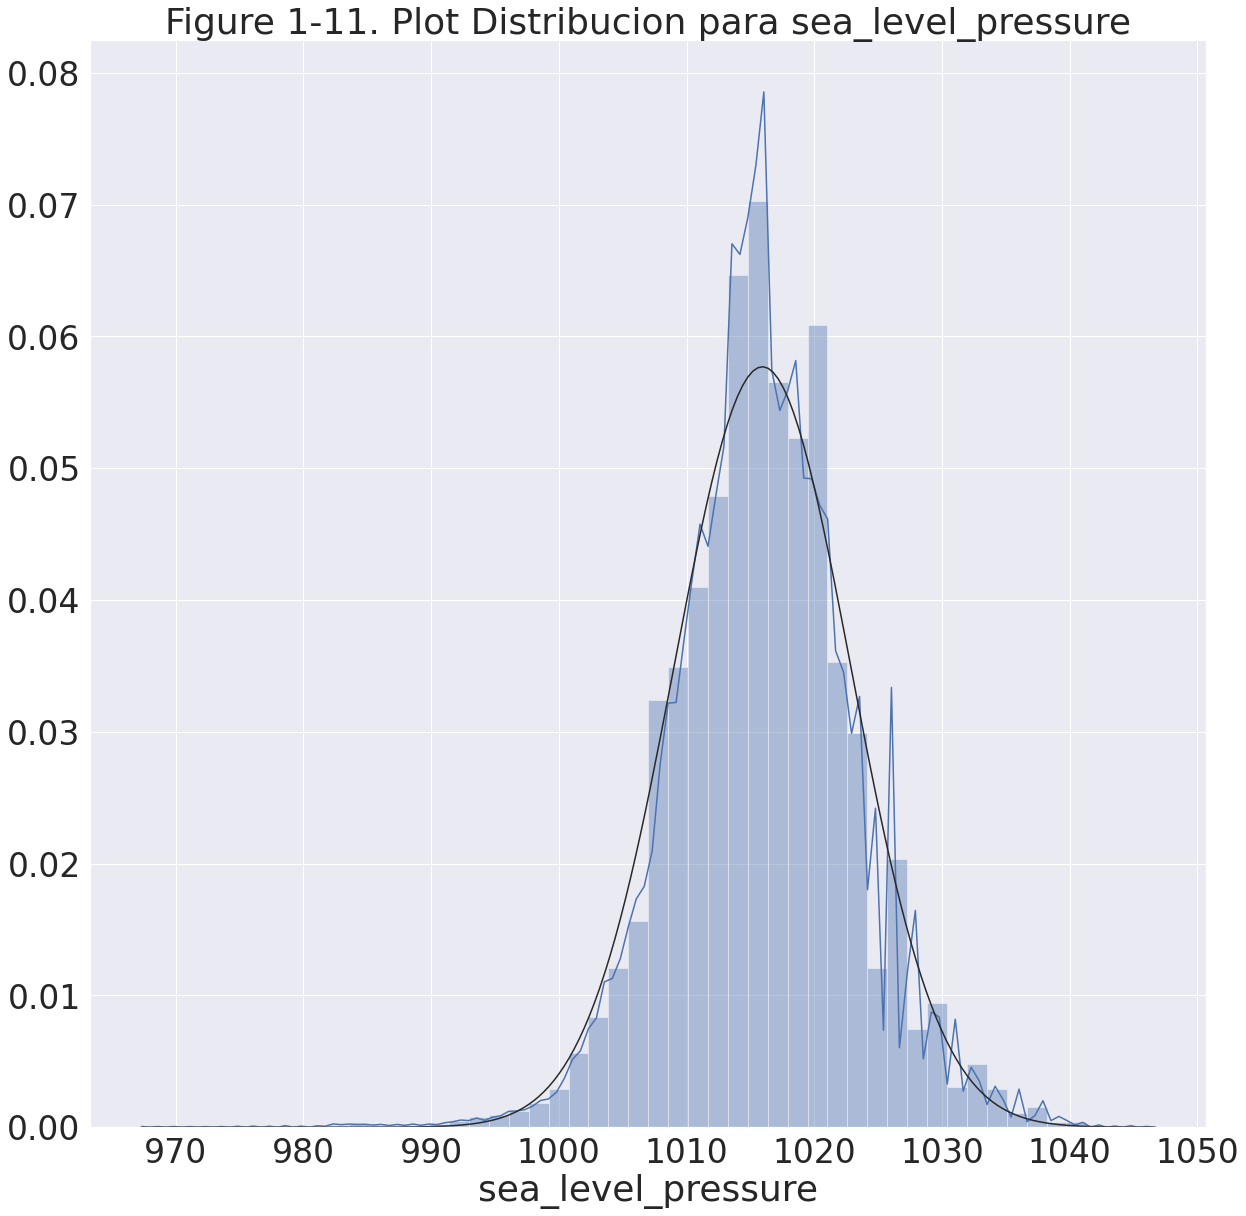

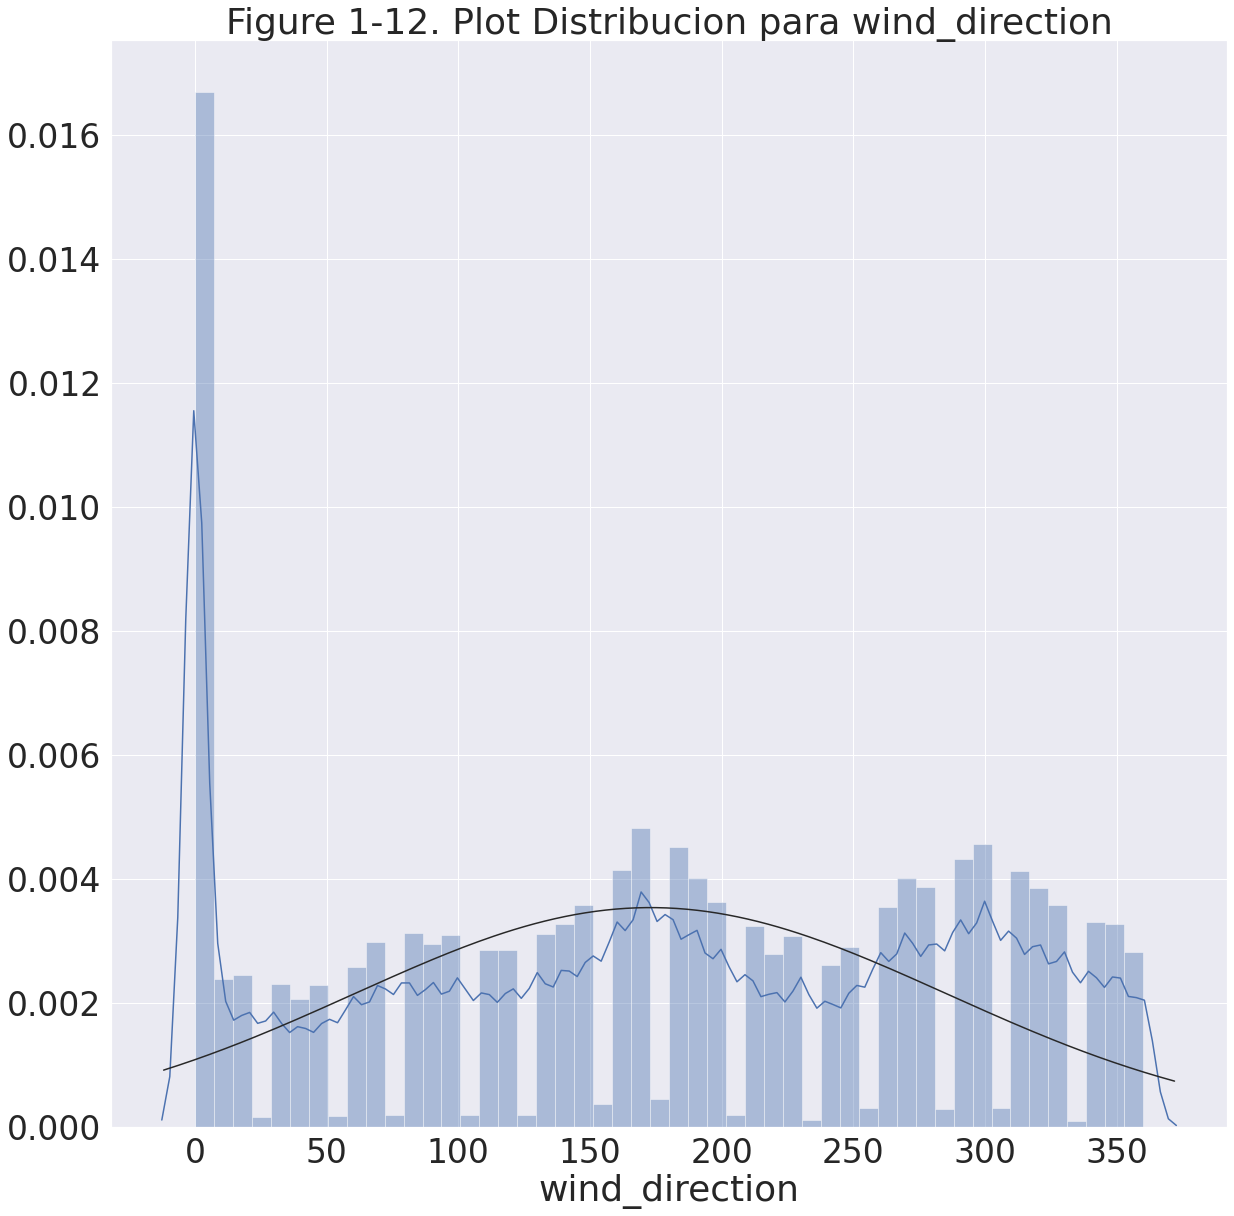

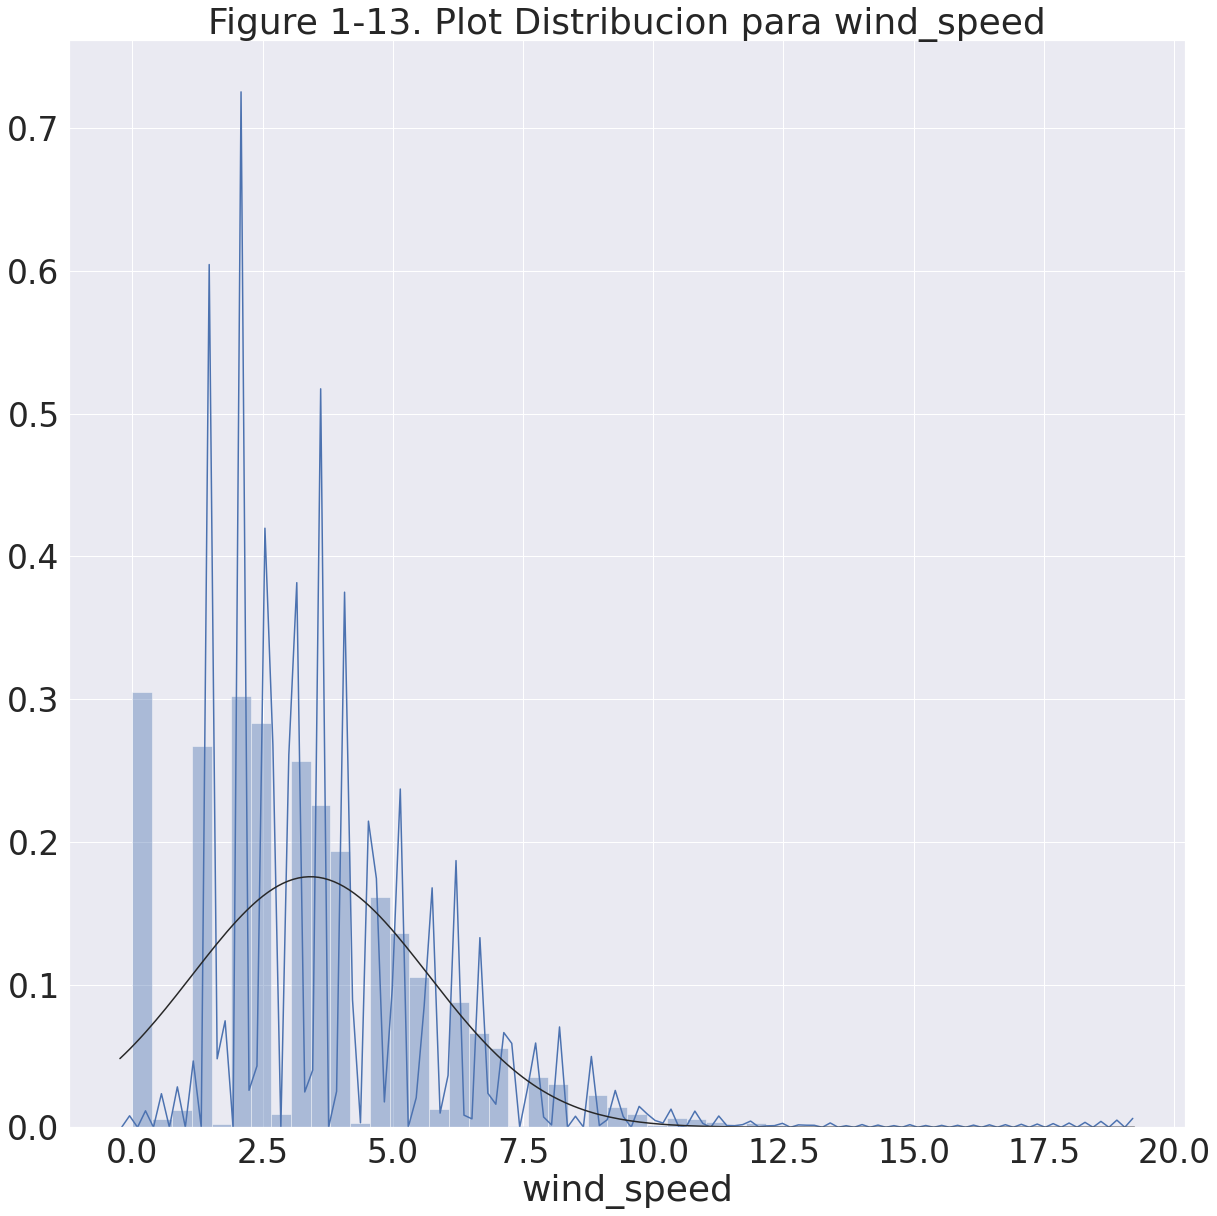

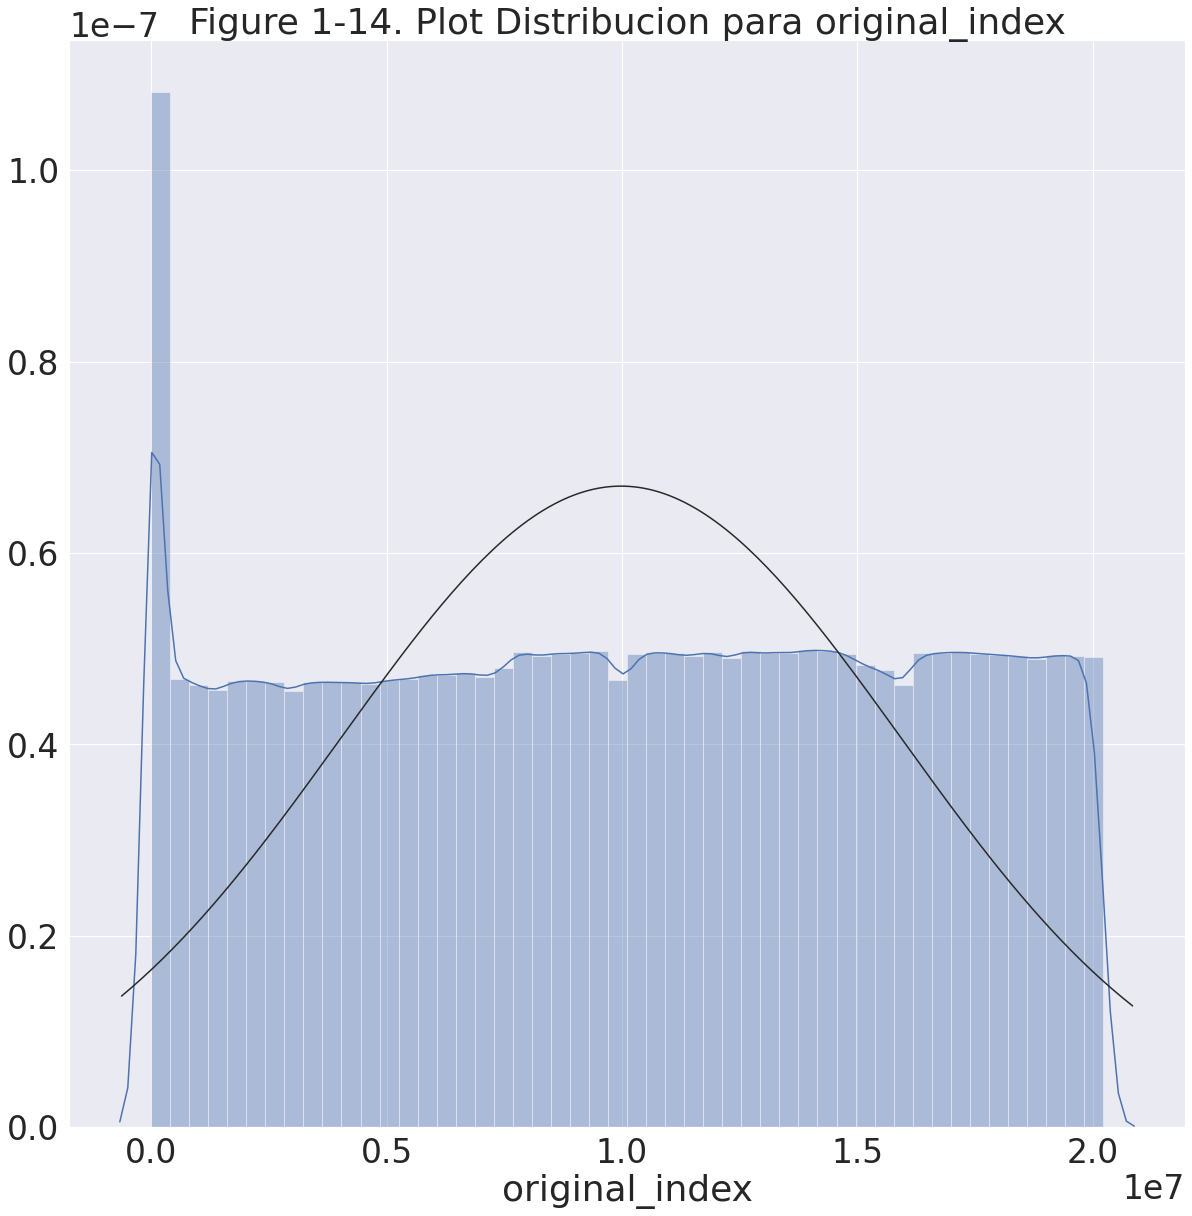

In [ ]:
name=['building_id','meter','site_id','primary_use','square_meter','meter_reading','year_built','air_temperature','dew_temperature','seal_level_pressure','wind_direction',
      'wind_speed','original_index']
i=0    
for name in list(train_df.drop(['timestamp'],axis=1)):
    sns.set(font_scale = 3)
    plt.subplots(figsize=(20, 20))
    sns.distplot(train_df[name],fit = norm)
    plt.title('Figure 1-{}. Plot Distribucion para {}'.format(i,name))
    plt.show()
    i=i+1
    

In [ ]:
print("{} percent of {} are outliers."
      .format((
              (100 * outlier_function(train_df, 'meter_reading')[2])
               / len(train_df['meter_reading'])),
              'meter_reading'))

7.744025995723372 percent of meter_reading are outliers.


In [ ]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(train_df[column], color='green', ax=ax, fit = norm).set_title(column, fontsize=16)
    sns.distplot(test_df[column], color='purple', ax=ax,fit = norm).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train_df', 'test_df'])
    plt.show()

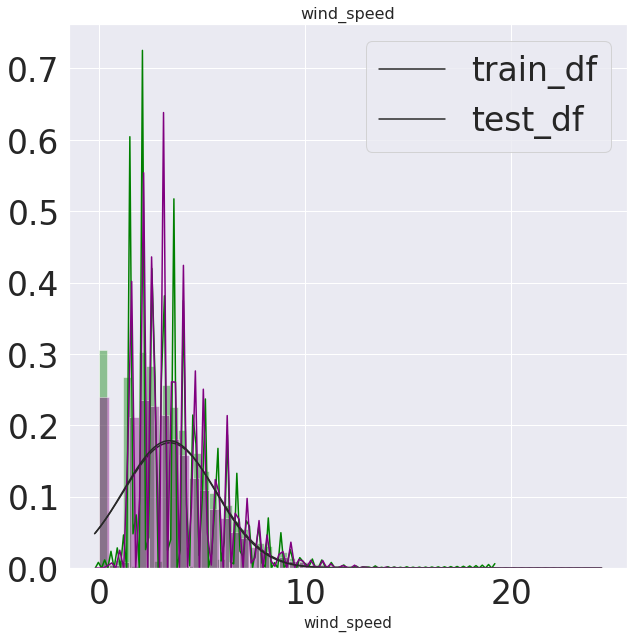

In [ ]:
plot_dist_col('wind_speed')

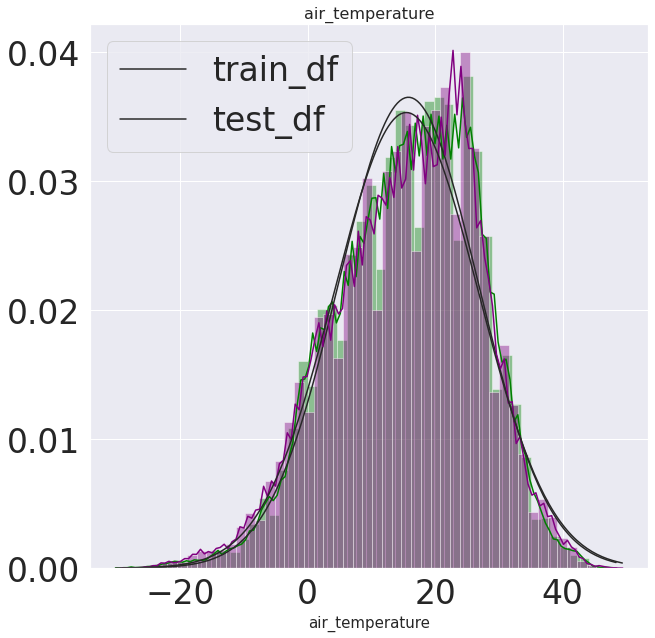

In [ ]:
plot_dist_col('air_temperature')

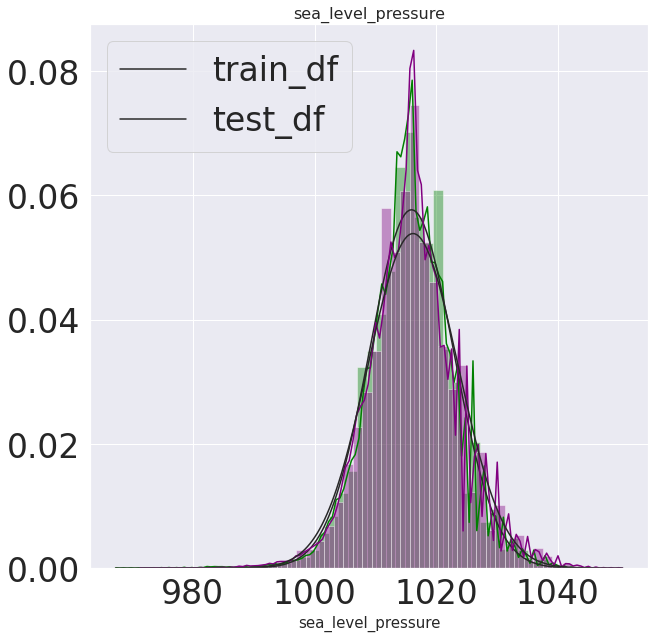

In [ ]:
plot_dist_col('sea_level_pressure')

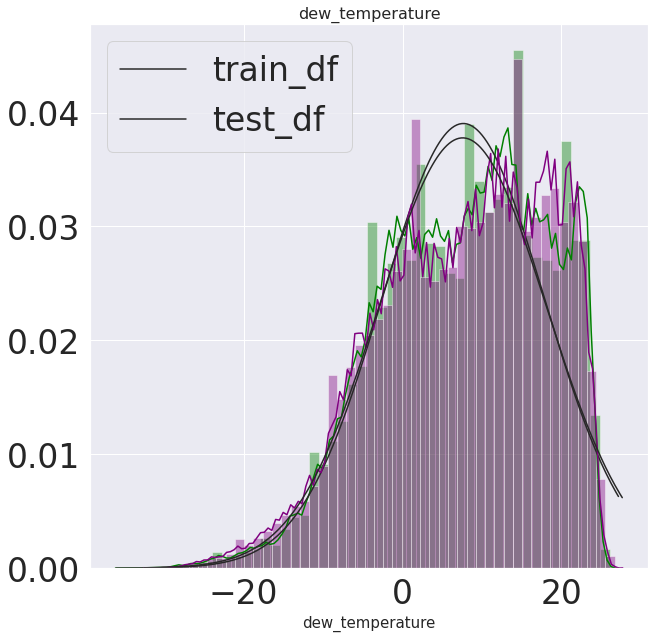

In [ ]:
plot_dist_col('dew_temperature')

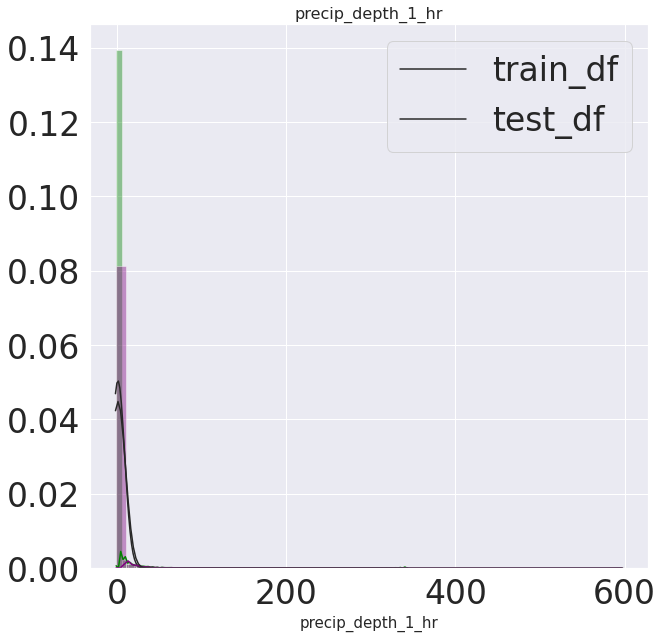

In [ ]:
plot_dist_col('precip_depth_1_hr')

2.4 Correlaciones correlaciones entre datos


Se ha tratado con variables categóricas y los valores atípicos ahora se analizaran y se comprenderan los datos en busca de correlaciones entre las características y la variable objetivo. Se utilizara el coeficiente de correlación de Pearson entre cada variable y el objetivo utilizando el método de marco de datos .corr.

In [ ]:

train_df.corr().style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1)

In [ ]:
corr = train_df.corr()
corr[['meter_reading']].sort_values(by = 'meter_reading',ascending = False)\
.style.background_gradient()

In [ ]:
# correlación más negativa
train_df.corr().idxmin()

building_id              air_temperature
meter                    air_temperature
site_id                  air_temperature
primary_use                 square_meter
square_meter                 primary_use
meter_reading            air_temperature
year_built                   building_id
air_temperature              building_id
cloud_coverage               building_id
dew_temperature       sea_level_pressure
precip_depth_1_hr     sea_level_pressure
sea_level_pressure       air_temperature
wind_direction           dew_temperature
wind_speed            sea_level_pressure
original_index                wind_speed
dtype: object

In [ ]:
#correlacion mas positiva
a=train_df.drop(['meter_reading','square_meter'],axis=1).corr()
np.fill_diagonal(a.values,-1)
a.idxmax()

building_id                   site_id
meter                     building_id
site_id                   building_id
primary_use            cloud_coverage
year_built            air_temperature
air_temperature       dew_temperature
cloud_coverage             wind_speed
dew_temperature       air_temperature
precip_depth_1_hr     dew_temperature
sea_level_pressure     original_index
wind_direction             wind_speed
wind_speed             wind_direction
original_index        dew_temperature
dtype: object

2.4.1 Visualizacion de datos

Relación entre el uso del edificio y la antigüedad del edificio:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

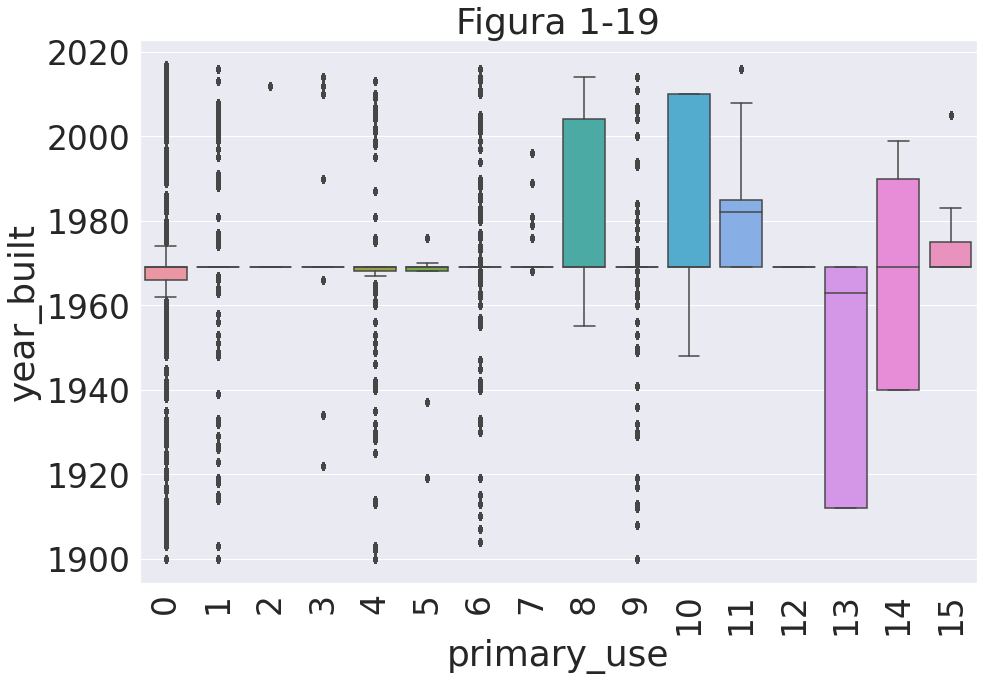

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='primary_use', y='year_built', data=train_df)
plt.title('Figura 1-19')
plt.xticks(rotation=90)



In [ ]:
print(LE_name_mapping)

{'Education': 0, 'Entertainment/public assembly': 1, 'Food sales and service': 2, 'Healthcare': 3, 'Lodging/residential': 4, 'Manufacturing/industrial': 5, 'Office': 6, 'Other': 7, 'Parking': 8, 'Public services': 9, 'Religious worship': 10, 'Retail': 11, 'Services': 12, 'Technology/science': 13, 'Utility': 14, 'Warehouse/storage': 15}



Parece que algunos tipos de edificios se construyeron antes, como los que se usan como edificios tecnológicos. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

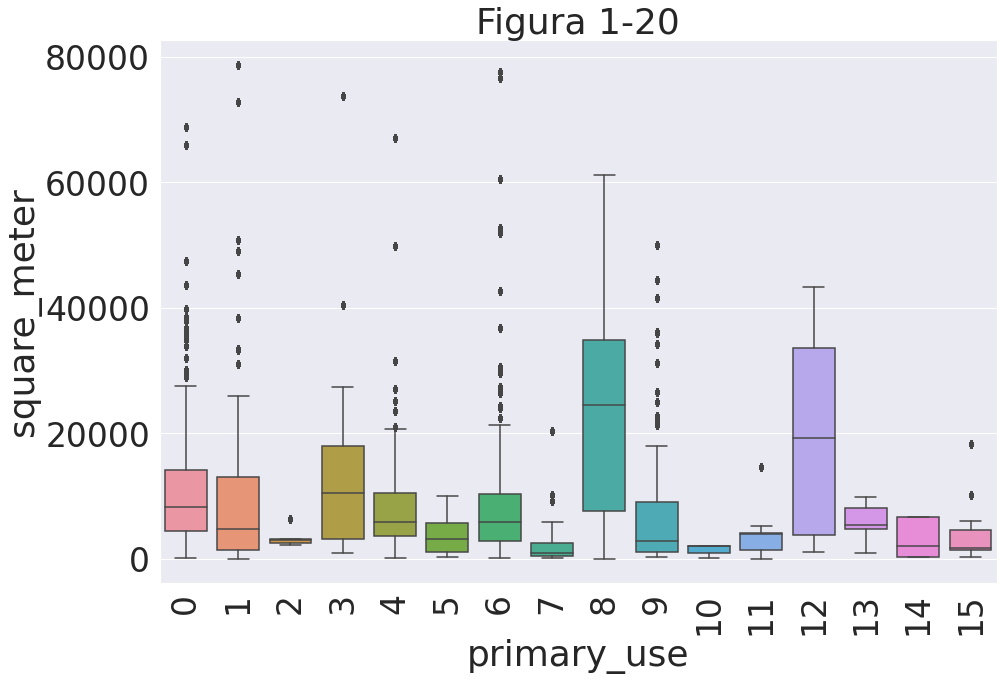

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='primary_use', y='square_meter', data=train_df)
plt.title('Figura 1-20')
plt.xticks(rotation=90)


In [ ]:
print(LE_name_mapping)

{'Education': 0, 'Entertainment/public assembly': 1, 'Food sales and service': 2, 'Healthcare': 3, 'Lodging/residential': 4, 'Manufacturing/industrial': 5, 'Office': 6, 'Other': 7, 'Parking': 8, 'Public services': 9, 'Religious worship': 10, 'Retail': 11, 'Services': 12, 'Technology/science': 13, 'Utility': 14, 'Warehouse/storage': 15}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

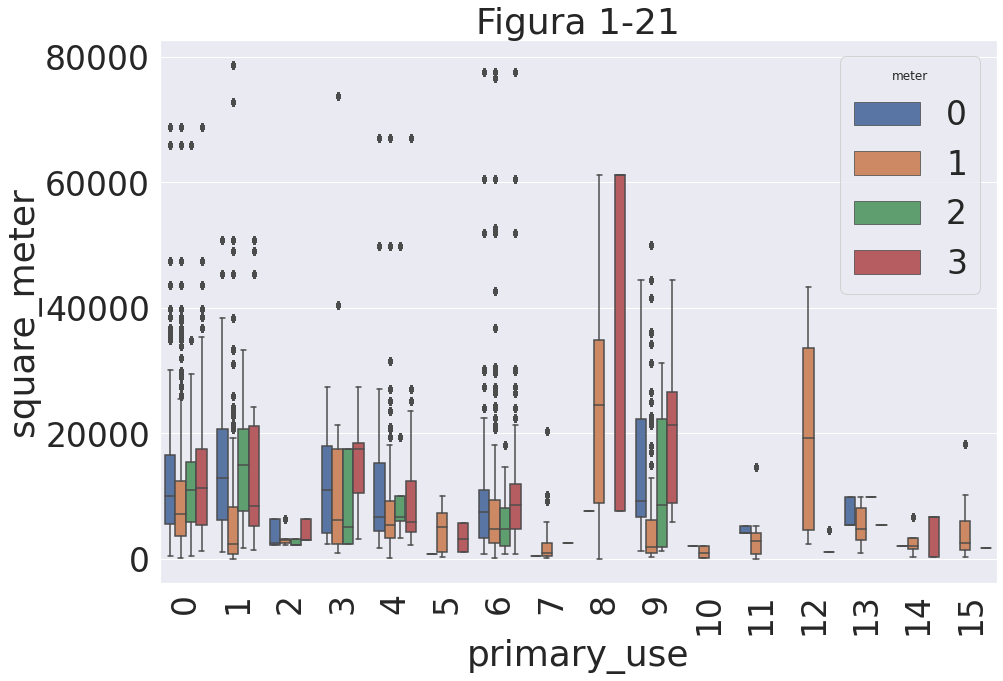

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='primary_use', y='square_meter', hue='meter',data=train_df)
plt.title('Figura 1-21')
plt.xticks(rotation=90)



In [ ]:
print(LE_name_mapping)

{'Education': 0, 'Entertainment/public assembly': 1, 'Food sales and service': 2, 'Healthcare': 3, 'Lodging/residential': 4, 'Manufacturing/industrial': 5, 'Office': 6, 'Other': 7, 'Parking': 8, 'Public services': 9, 'Religious worship': 10, 'Retail': 11, 'Services': 12, 'Technology/science': 13, 'Utility': 14, 'Warehouse/storage': 15}



El resultado es claro. Algunos de los edificios solo instalan dos o tres tipos de medidores, y el área de construcción correspondiente también puede tener diferencias significativas.

2.5 Tendencias con series de datos

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


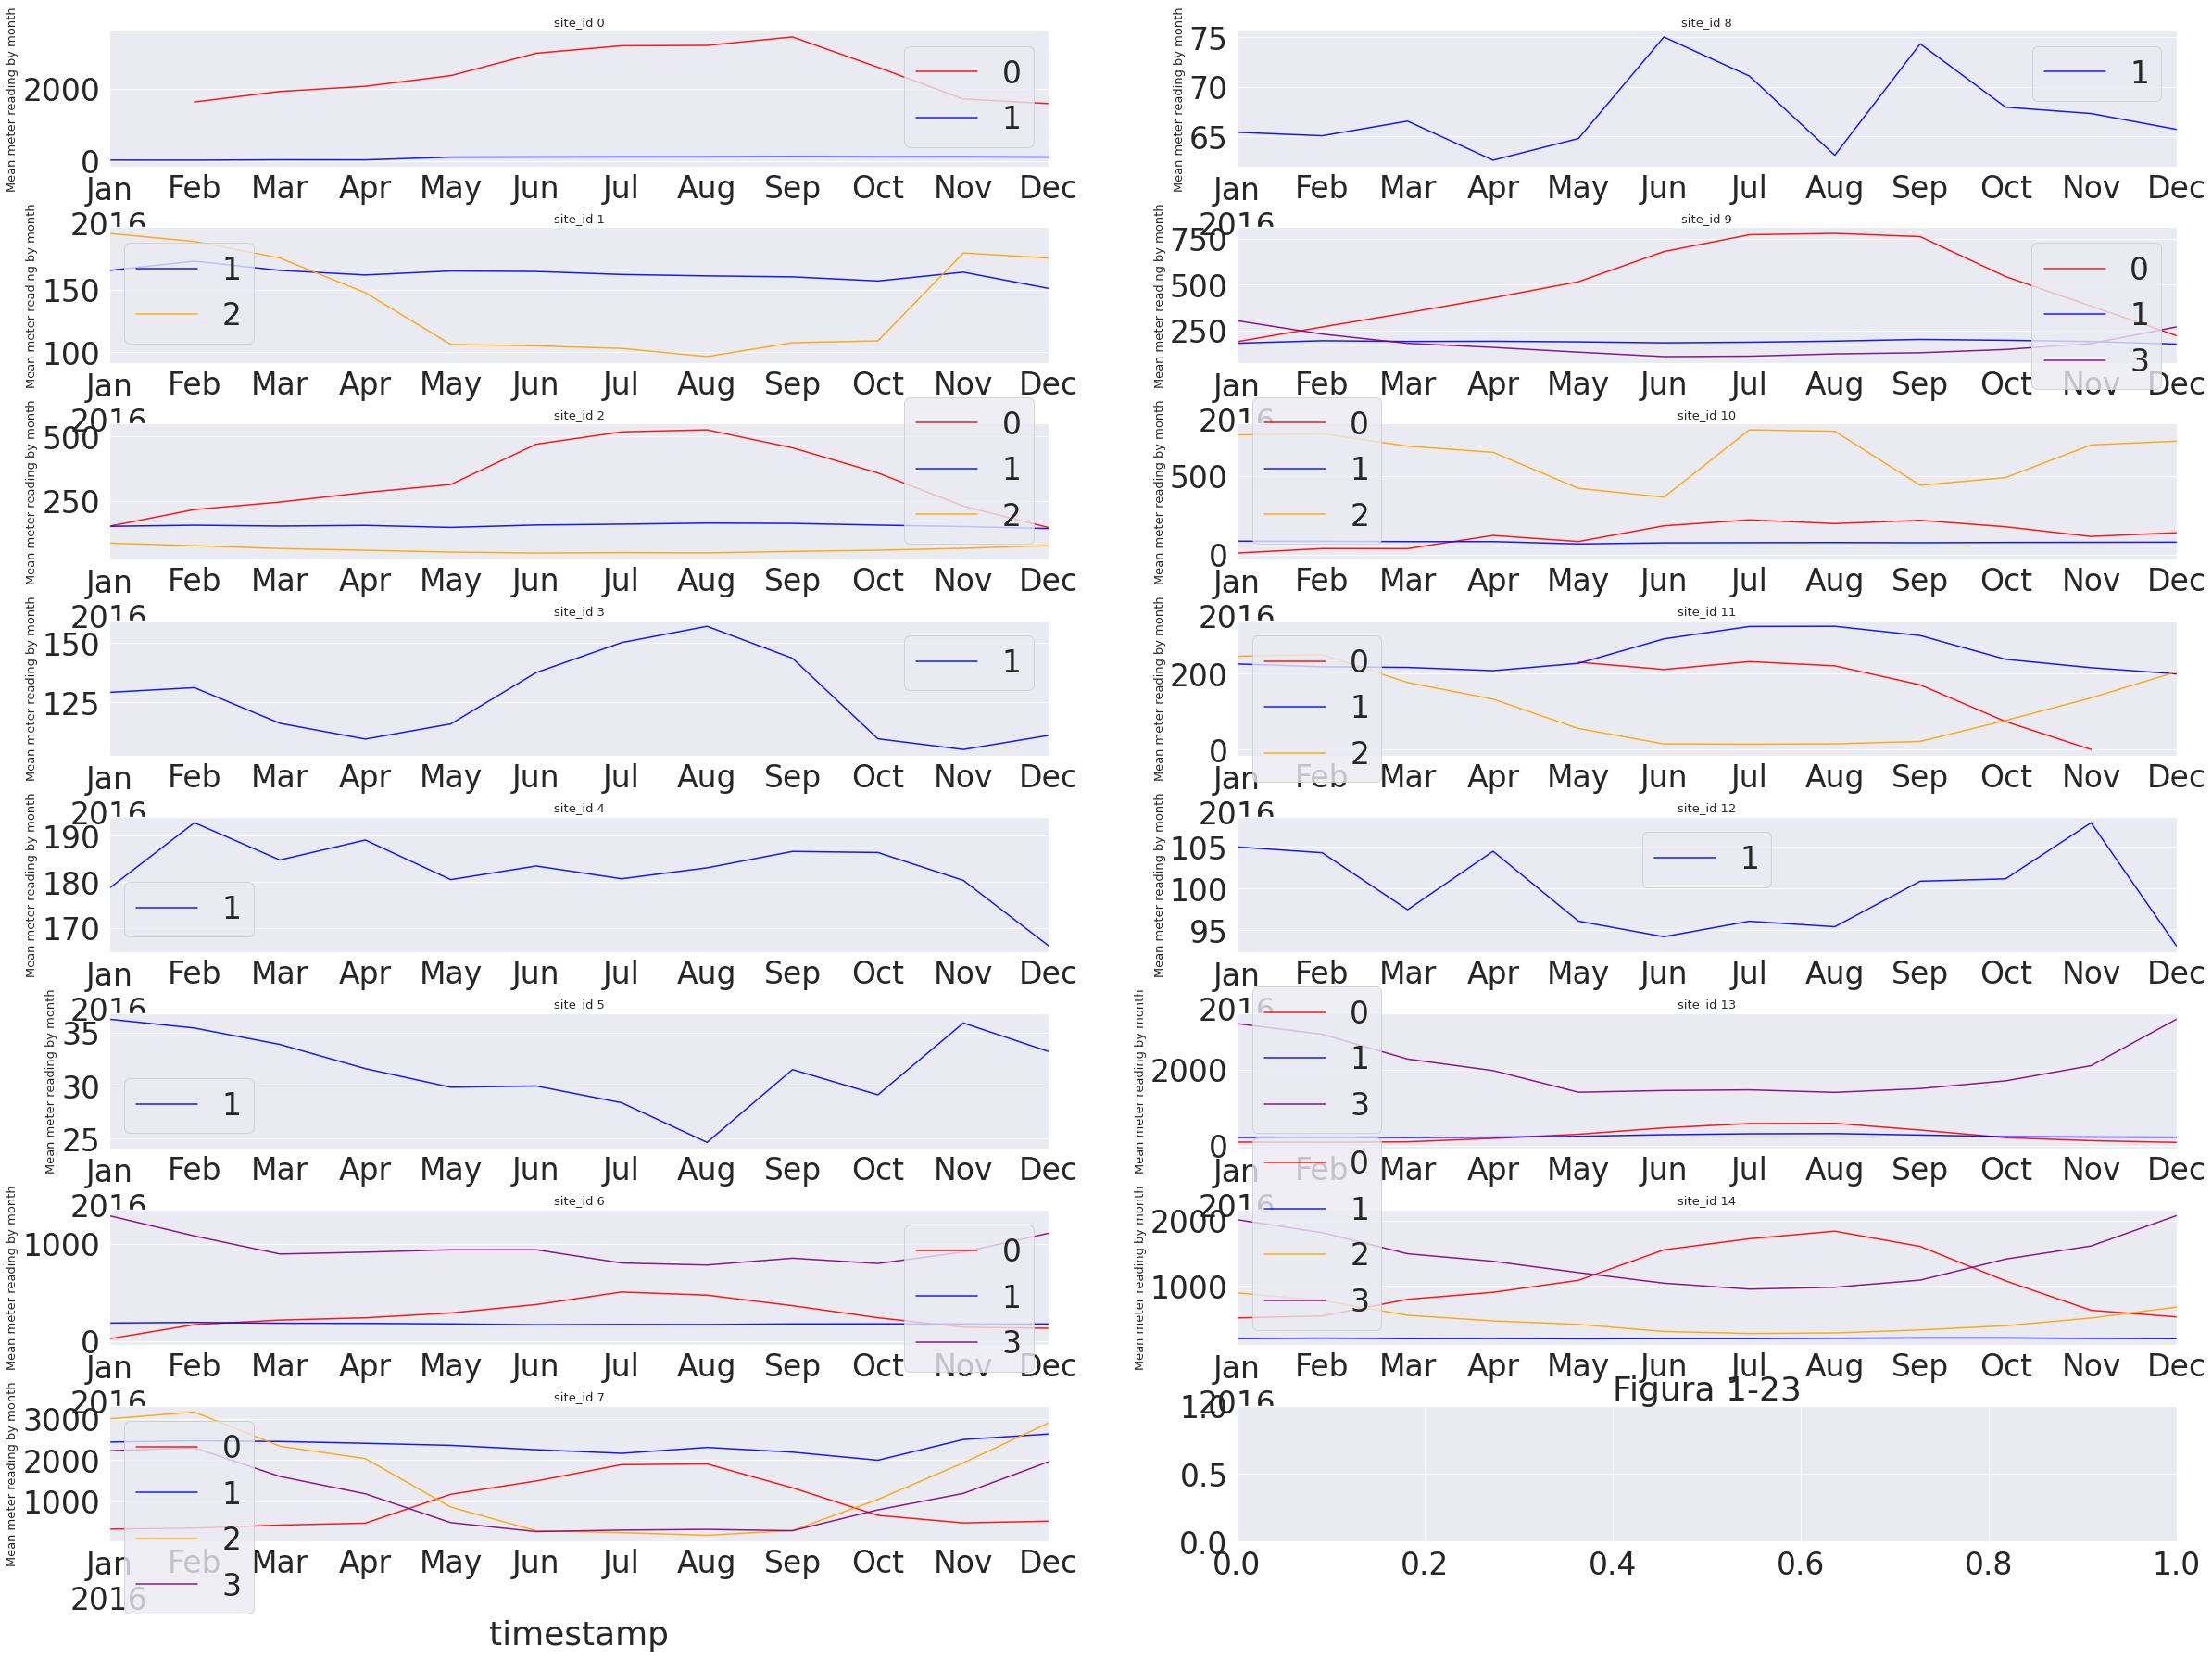

In [ ]:
# Tendencia por mes
fig, axes = plt.subplots(8,2,figsize=(40, 30))
color_dic={'red':0,'blue':1,'orange':2,'purple':3}
plt.title('Figura 1-23')
for i in range(0,15):    
    for color,meter in color_dic.items():
        if(len(train_df[(train_df['site_id']==i)&(train_df['meter']==meter)])!=0):
            train_df[(train_df['site_id']==i)&(train_df['meter']==meter)][['timestamp', 'meter_reading']].set_index('timestamp').resample('M').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.9, label=str(meter), color=color).set_ylabel('Mean meter reading by month', fontsize=13)
        axes[i%8][i//8].legend();
        axes[i%8][i//8].set_title('site_id {}'.format(i), fontsize=13);
        plt.subplots_adjust(hspace=0.45)

2.5.1 Graficas de Condiciones climaticas


La condición climática también puede tener conexiones con el consumo de energía, también podemos visualizarlo.

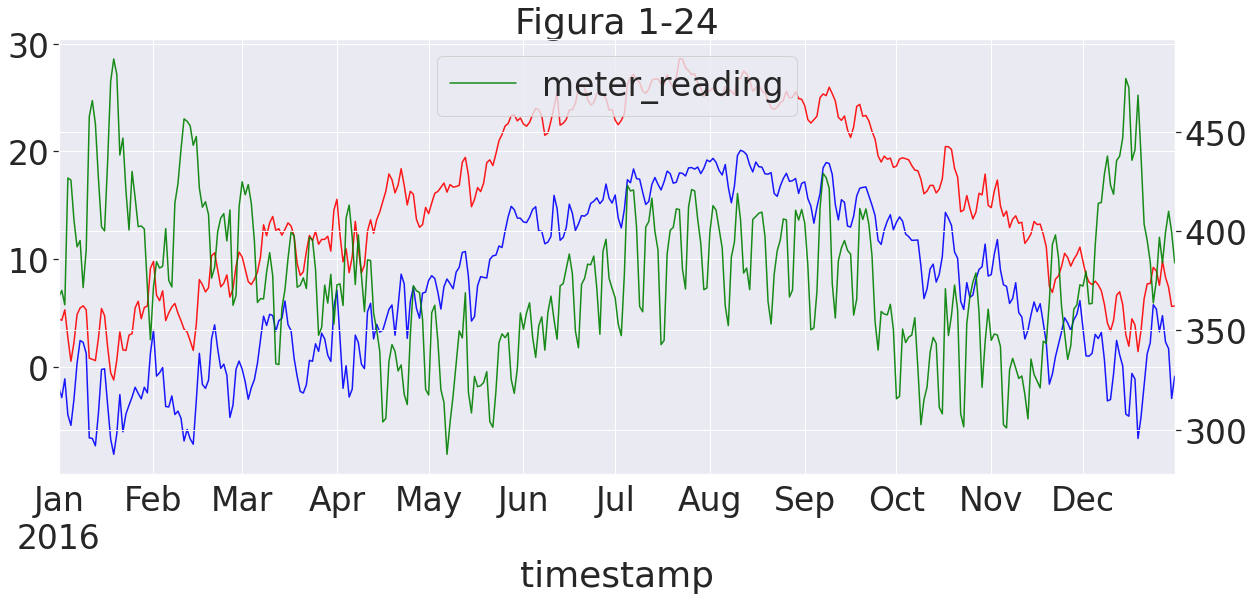

In [ ]:
# Condiciones climaticas por dia
fig, axes = plt.subplots(figsize=(20,8))
plt.title('Figura 1-24')
axes1=axes.twinx()
train_df[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes1,alpha=0.9, label='meter_reading', color='green')
train_df[['timestamp', 'air_temperature']].set_index('timestamp').resample('D').mean()['air_temperature'].plot(ax=axes,alpha=0.9, label='air_temperature', color='red')
train_df[['timestamp', 'dew_temperature']].set_index('timestamp').resample('D').mean()['dew_temperature'].plot(ax=axes,alpha=0.9, label='dew_temperature', color='blue')
plt.legend()

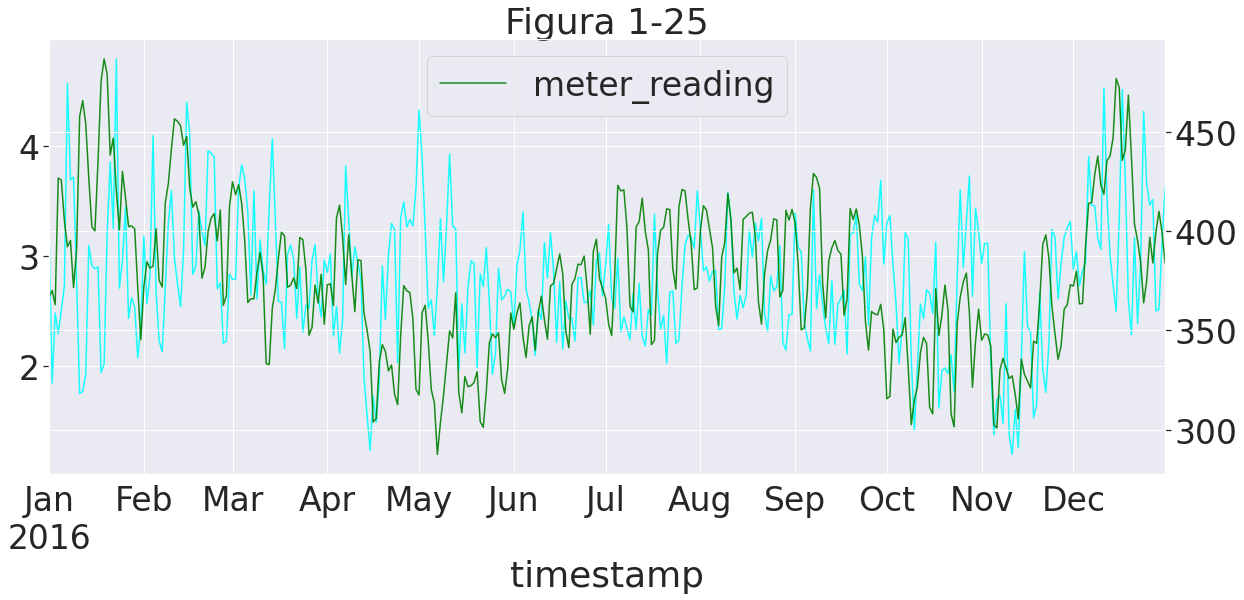

In [ ]:
# Condición de las nubes (por día)
fig, axes = plt.subplots(figsize=(20,8))
plt.title('Figura 1-25')
axes1=axes.twinx()
train_df[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes1,alpha=0.9, label='meter_reading', color='green')
train_df[['timestamp', 'cloud_coverage']].set_index('timestamp').resample('D').mean()['cloud_coverage'].plot(ax=axes,alpha=0.9, label='cloud_coverage', color='cyan')
plt.legend()

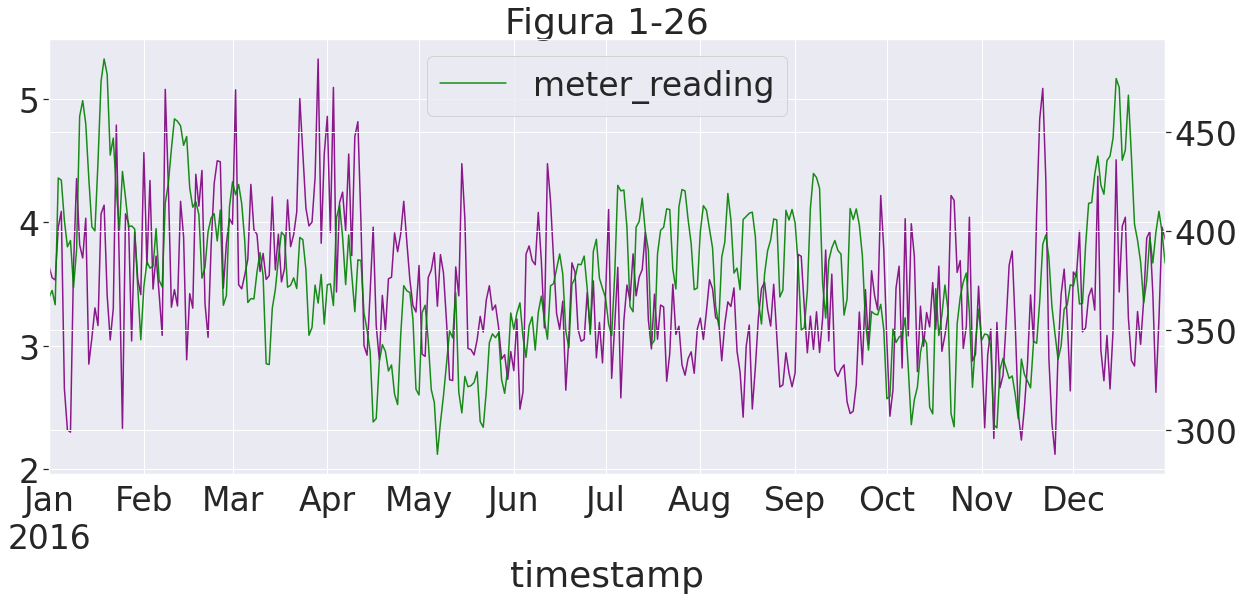

In [ ]:
# la condición del viento (por día)
fig, axes = plt.subplots(figsize=(20,8))
plt.title('Figura 1-26')
axes1=axes.twinx()
train_df[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes1,alpha=0.9, label='meter_reading', color='green')
train_df[['timestamp', 'wind_speed']].set_index('timestamp').resample('D').mean()['wind_speed'].plot(ax=axes,alpha=0.9, label='wind_speed', color='purple')
plt.legend()

In [ ]:
#train_df['meter'] = pd.Categorical(train_df['meter']).rename_categories({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'})
daily_train = train_df.copy()
daily_train['date'] = daily_train['timestamp'].dt.date
daily_train = daily_train.groupby(['date', 'building_id', 'meter']).sum()
daily_train

site_id  primary_use   square_meter  \
date       building_id meter                                        
2016-01-01 20          1          0.0          0.0   19848.960938   
           46          1          0.0        264.0   19537.199219   
           54          1          0.0          0.0    1416.060059   
           70          1          0.0          8.0   34887.421875   
           74          1          0.0         24.0  104662.265625   
...                               ...          ...            ...   
2016-12-31 1444        1        360.0         24.0   42377.039062   
           1445        1        360.0          0.0    9283.679688   
           1446        1         90.0          6.0    6083.099609   
           1447        1        360.0         96.0   64314.000000   
           1448        1        360.0        144.0  199305.343750   

                              meter_reading  year_built  air_temperature  \
date       building_id meter                                               
2016-01-01 20          1          51.929146      3954.0        45.500000   
           46          1         392.994720     48384.0       560.000000   
           54          1          73.621445      4022.0        48.875000   
           70          1           5.121483      2007.0        28.296875   
           74          1          23.306786      5992.0        71.687500   
...                                     ...         ...              ...   
2016-12-31 1444        1         177.175003     45952.0       -39.593750   
           1445        1         134.250000     47264.0       -39.593750   
           1446        1          31.650000     11984.0       -16.000000   
           1447        1        3757.199951     48032.0       -39.593750   
           1448        1          79.974998     48032.0       -39.593750   

                              cloud_coverage  dew_temperature  \
date       building_id meter                                    
2016-01-01 20          1            10.00000         41.68750   
           46          1           128.00000        480.50000   
           54          1            12.00000         38.90625   
           70          1             6.00000         19.40625   
           74          1            18.00000         60.00000   
...                                      ...              ...   
2016-12-31 1444        1            61.65625       -176.12500   
           1445        1            61.65625       -176.12500   
           1446        1            17.34375        -43.40625   
           1447        1            61.65625       -176.12500   
           1448        1            61.28125       -176.12500   

                              precip_depth_1_hr  sea_level_pressure  \
date       building_id meter                                          
2016-01-01 20          1                   -1.0              2039.0   
           46          1                   -4.5             24448.0   
           54          1                    0.0              2036.0   
           70          1                    0.0              1017.0   
           74          1                   -0.5              3058.0   
...                                         ...                 ...   
2016-12-31 1444        1                  -24.0             24288.0   
           1445        1                  -24.0             24288.0   
           1446        1                   -6.0              6084.0   
           1447        1                  -24.0             24288.0   
           1448        1                  -24.0             24288.0   

                              wind_direction  wind_speed  original_index  
date       building_id meter                                              
2016-01-01 20          1               360.0    3.000000           23002  
           46          1              2950.0   44.500000          634890  
           54          1               210.0    4.101562           71290 

In [ ]:
daily_train_agg = daily_train.groupby(['date', 'meter']).agg(['sum', 'mean', 'idxmax', 'max'])
daily_train_agg = daily_train_agg.reset_index()
level_0 = daily_train_agg.columns.droplevel(0)
level_1 = daily_train_agg.columns.droplevel(1)
level_0 = ['' if x == '' else '-' + x for x in level_0]
daily_train_agg.columns = level_1 + level_0
daily_train_agg.rename_axis(None, axis=1)
daily_train_agg.head()

date  meter  site_id-sum  site_id-mean         site_id-idxmax  \
0 2016-01-01      0      72756.0    213.988235  (2016-01-01, 1326, 0)   
1 2016-01-01      0      72756.0    213.988235  (2016-01-01, 1326, 0)   
2 2016-01-01      1     222832.0    174.770196  (2016-01-01, 1326, 1)   
3 2016-01-01      1     222832.0    174.770196  (2016-01-01, 1326, 1)   
4 2016-01-01      2      23961.0    180.157895  (2016-01-01, 1325, 2)   

   site_id-max  primary_use-sum  primary_use-mean     primary_use-idxmax  \
0        360.0          21037.0         61.873529   (2016-01-01, 285, 0)   
1        360.0          21037.0         61.873529   (2016-01-01, 285, 0)   
2        360.0         102155.0         80.121569   (2016-01-01, 164, 1)   
3        360.0         102155.0         80.121569   (2016-01-01, 164, 1)   
4        360.0           7548.0         56.751880  (2016-01-01, 1017, 2)   

   primary_use-max  square_meter-sum  square_meter-mean  \
0            336.0        92330496.0      271560.281250   
1            336.0        92330496.0      271560.281250   
2            360.0       251065664.0      196914.250000   
3            360.0       251065664.0      196914.250000   
4            312.0        32585554.0      245004.171875   

     square_meter-idxmax  square_meter-max  meter_reading-sum  \
0  (2016-01-01, 1148, 0)       1860891.750        1428045.375   
1  (2016-01-01, 1148, 0)       1860891.750        1428045.375   
2   (2016-01-01, 869, 1)       1890000.000        4220776.500   
3   (2016-01-01, 869, 1)       1890000.000        4220776.500   
4   (2016-01-01, 794, 2)       1581001.125        1620164.375   

   meter_reading-mean   meter_reading-idxmax  meter_reading-max  \
0         4200.133301  (2016-01-01, 1289, 0)      104211.648438   
1         4200.133301  (2016-01-01, 1289, 0)      104211.648438   
2         3310.413086   (2016-01-01, 803, 1)      116037.179688   
3         3310.413086   (2016-01-01, 803, 1)      116037.179688   
4        12181.687500  (2016-01-01, 1331, 2)      219824.531250   

   year_built-sum  year_built-mean     year_built-idxmax  year_built-max  \
0             inf          44128.0  (2016-01-01, 181, 0)         48320.0   
1             inf          44128.0  (2016-01-01, 181, 0)         48320.0   
2             inf          46720.0  (2016-01-01, 363, 1)         48416.0   
3             inf          46720.0  (2016-01-01, 363, 1)         48416.0   
4             inf          44928.0  (2016-01-01, 179, 2)         48288.0   

   air_temperature-sum  air_temperature-mean air_temperature-idxmax  \
0              33600.0                98.875   (2016-01-01, 166, 0)   
1              33600.0                98.875   (2016-01-01, 166, 0)   
2                  inf               121.625    (2016-01-01, 46, 1)   
3                  inf               121.625    (2016-01-01, 46, 1)   
4              14200.0               106.750   (2016-01-01, 225, 2)   

   air_temperature-max  cloud_coverage-sum  cloud_coverage-mean  \
0              234.250             19104.0             56.21875   
1              234.250             19104.0             56.21875   
2              560.000                 inf             84.06250   
3              560.000                 inf             84.06250   
4              236.875              4568.0             34.34375   

   cloud_coverage-idxmax  cloud_coverage-max  dew_temperature-sum  \
0   (2016-01-01, 802, 0)             123.500             -23120.0   
1   (2016-01-01, 802, 0)             123.500             -23120.0   
2  (2016-01-01, 1029, 1)             191.000             -33632.0   
3  (2016-01-01, 1029, 1)             191.000             -33632.0   
4  (2016-01-01, 1029, 2)             182.375             -12424.0   

   dew_temperature-mean dew_temperature-idxmax  dew_temperature-max  \
0              -68.0000   (2016-01-01, 874, 0)               41.500   
1              -68.0000   (2016-01-01, 874, 0)               41.500   
2              -26.3750    (2016-01-01, 46, 1)  

In [ ]:
fig_total = px.line(daily_train_agg, x='date', y='meter_reading-sum', color='meter', render_mode='svg')
fig_total.update_layout(title='Figura 1-27, Total de kWh por aspecto energético')
fig_total.show()

In [ ]:
fig_maximum = px.line(daily_train_agg, x='date', y='meter_reading-max', color='meter', render_mode='svg')
fig_maximum.update_layout(title='Figura 1-28, Valor máximo de kWh por aspecto energético')
fig_maximum.show()

In [ ]:
# Reducir memoria
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Memoria usada disminuida a 840.54 Mb (4.1% reduccion)
Memoria usada disminuida a 1471.34 Mb (0.0% reduccion)


In [ ]:
train_df.to_csv(BASE_FOLDER+'train_df.csv', index=False)
test_df.to_csv(BASE_FOLDER+'test_df.csv', index= False)
